# Do you want to know why you lose hair?

## 📖 Background
As we age, hair loss becomes one of the health concerns of many people. The fullness of hair not only affects appearance, but is also closely related to an individual's health.

A survey brings together a variety of factors that may contribute to hair loss, including genetic factors, hormonal changes, medical conditions, medications, nutritional deficiencies, psychological stress, and more. Through data exploration and analysis, the potential correlation between these factors and hair loss can be deeply explored, thereby providing useful reference for the development of individual health management, medical intervention and related industries.

## 💾 The data

The survey provides the information you need in the `Predict Hair Fall.csv` in the `data` folder.

#### Data contains information on persons in this survey. Each row represents one person.
- "Id" - A unique identifier for each person.
- "Genetics" - Whether the person has a family history of baldness.
- "Hormonal Changes" - Indicates whether the individual has experienced hormonal changes (Yes/No).
- "Medical Conditions" - Medical history that may lead to baldness; alopecia areata, thyroid problems, scalp infections, psoriasis, dermatitis, etc.
- "Medications & Treatments" - History of medications that may cause hair loss; chemotherapy, heart medications, antidepressants, steroids, etc.
- "Nutritional Deficiencies" - Lists nutritional deficiencies that may contribute to hair loss, such as iron deficiency, vitamin D deficiency, biotin deficiency, omega-3 fatty acid deficiency, etc.
- "Stress" - Indicates the stress level of the individual (Low/Moderate/High).
- "Age" - Represents the age of the individual.
- "Poor Hair Care Habits" - Indicates whether the individual practices poor hair care habits (Yes/No).
- "Environmental Factors" - Indicates whether the individual is exposed to environmental factors that may contribute to hair loss (Yes/No).
- "Smoking" - Indicates whether the individual smokes (Yes/No).
- "Weight Loss" - Indicates whether the individual has experienced significant weight loss (Yes/No).
- "Hair Loss" - Binary variable indicating the presence (1) or absence (0) of baldness in the individual.

In [5]:
import pandas as pd
data = pd.read_csv('data/Predict Hair Fall.csv')

## Problem statement
In order to know a certain factor cause hairloss, the factor shows significant weighing influence.I believe multivariate linear regression with regularizations can be useful. Using causal inference based regression can help if being male or female has causation too. We will explore more on this later. 

But First, it is important to properly view data: things to explore beforehand: 
    
1. NA values in each columns
2. Range of values and if there is anamoly. I mean what if the values of gender column is 20? 
3. Are the categorical columns in equal proportion ?
4. Are the regression values in normal distribution?

These four things can provide clear picture whether the data is ready to be explored. 

In [7]:
# Import all required libraries
import pandas as pd
import statsmodels.api as sm
import numpy as np  # Import numpy for the np.exp function
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, accuracy_score

ValueError: numpy.dtype size changed, may indicate binary incompatibility. Expected 96 from C header, got 88 from PyObject

In [406]:
# Clean the columnames
data.columns = data.columns.str.strip()
data_for_stats = data.copy()

In [407]:
# 1. sum them as True equals to 1: anycolumn with sum greater than zero has NA values
column_sums = data.isna().sum(skipna=False)
print(column_sums)

Id                          0
Genetics                    0
Hormonal Changes            0
Medical Conditions          0
Medications & Treatments    0
Nutritional Deficiencies    0
Stress                      0
Age                         0
Poor Hair Care Habits       0
Environmental Factors       0
Smoking                     0
Weight Loss                 0
Hair Loss                   0
dtype: int64


All columns sums to zero, so none of the values are NA. This is a good sign of good data quality.

In [408]:
#2. Max range of values anamoly
max_ranges = data.select_dtypes(include='number').agg(lambda x: x.max())
print(max_ranges)

Id           199949
Age              50
Hair Loss         1
dtype: int64


In [409]:
#2. Min range of values anamoly
min_ranges = data.select_dtypes(include='number').agg(lambda x: x.min())
print(min_ranges)

Id           110003
Age              18
Hair Loss         0
dtype: int64


The "No Data" values in the two columns " Medications & Treatments" AND "Medical Condition" is of concern.

In [410]:
# Print unique values from the 'Medical Conditions' and 'Treatment' columns
unique_conditions = data['Medical Conditions'].unique()
unique_treatments = data['Medications & Treatments'].unique()

print(unique_conditions)
print(unique_treatments)

['No Data' 'Eczema' 'Dermatosis' 'Ringworm' 'Psoriasis' 'Alopecia Areata '
 'Scalp Infection' 'Seborrheic Dermatitis' 'Dermatitis' 'Thyroid Problems'
 'Androgenetic Alopecia']
['No Data' 'Antibiotics' 'Antifungal Cream' 'Accutane' 'Chemotherapy'
 'Steroids' 'Rogaine' 'Blood Pressure Medication' 'Immunomodulators'
 'Antidepressants ' 'Heart Medication ']


Based on medicals cases, we can infer "No Data" as Other. 

In [411]:
# Replace 'No Data' with 'Other' in specified columns
data["Medical Conditions"] = data["Medical Conditions"].replace('No Data', 'Other')
data["Medications & Treatments"] = data["Medications & Treatments"].replace('No Data', 'Other')

print(data['Medical Conditions'].unique())

['Other' 'Eczema' 'Dermatosis' 'Ringworm' 'Psoriasis' 'Alopecia Areata '
 'Scalp Infection' 'Seborrheic Dermatitis' 'Dermatitis' 'Thyroid Problems'
 'Androgenetic Alopecia']


In [412]:
# count of the propotion of each columns
proportions_hair_loss = data["Hair Loss"].value_counts(normalize=False) #normalize don't divide by total count. You can use both True or False.
print(proportions_hair_loss)

Hair Loss
0    502
1    497
Name: count, dtype: int64


The proportion is excellent, and the dataset contains almost equal values of both yes and no. This informations is important because disproportionte proportion can skew dataset to favor specific outcome.

Other columns also needs to be investigated if they are in equal proportion. This can be useful if done with visualizations.

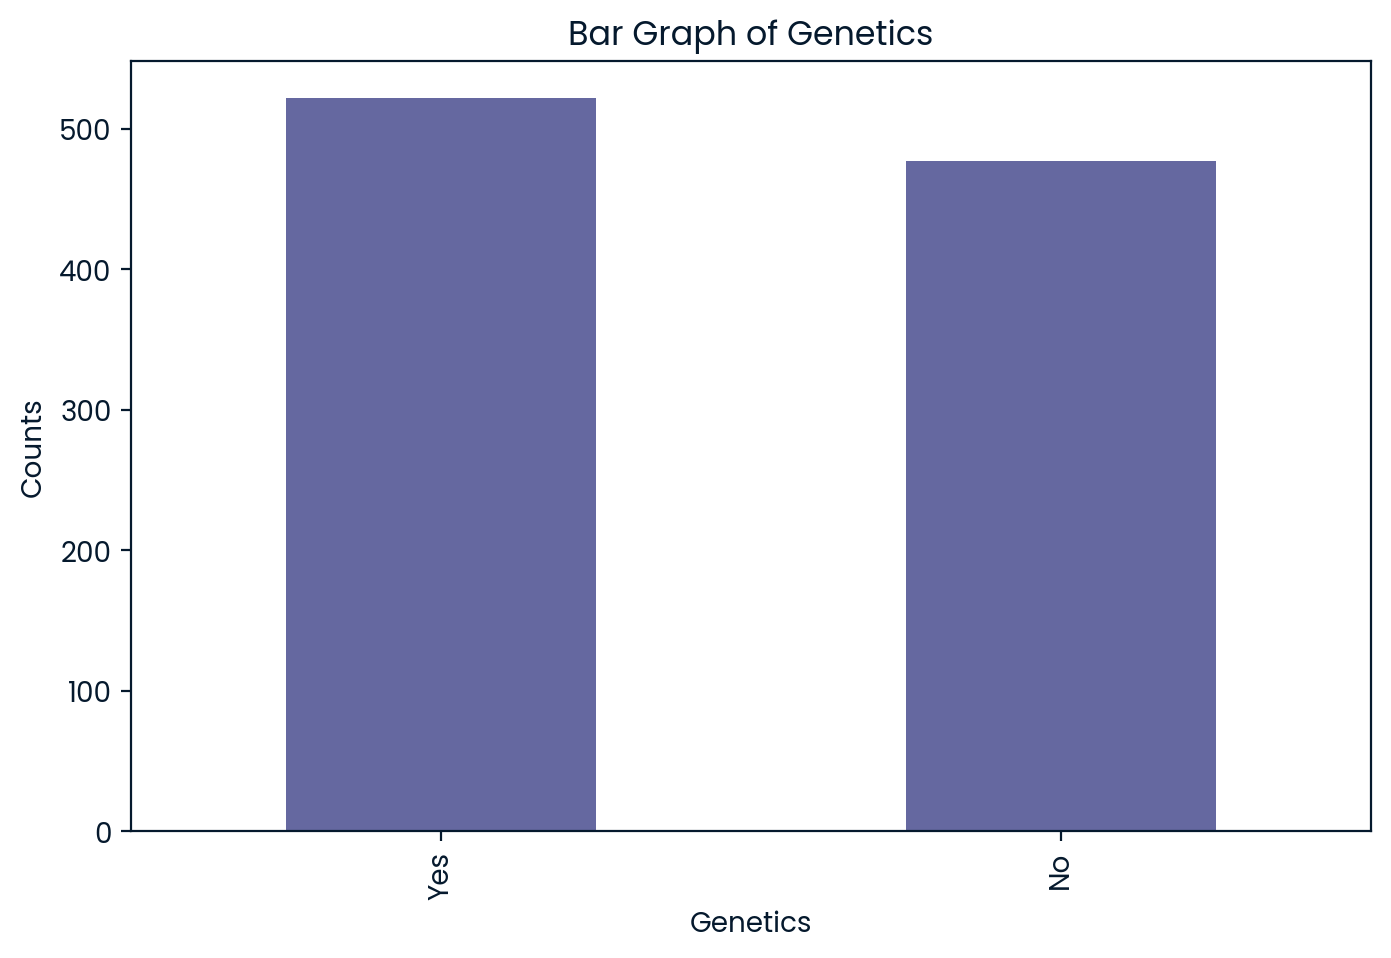

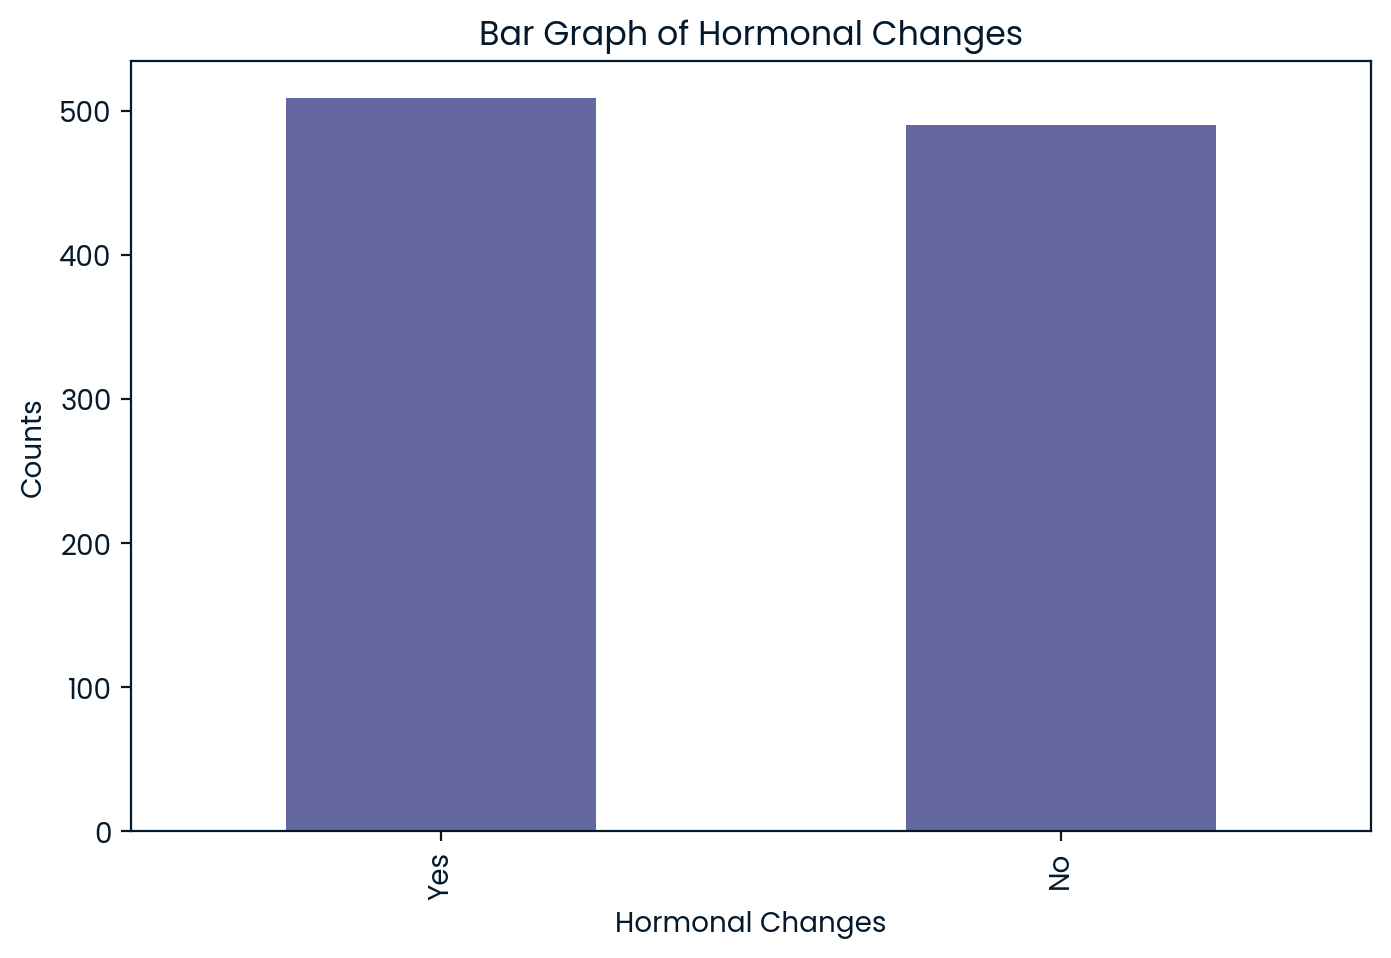

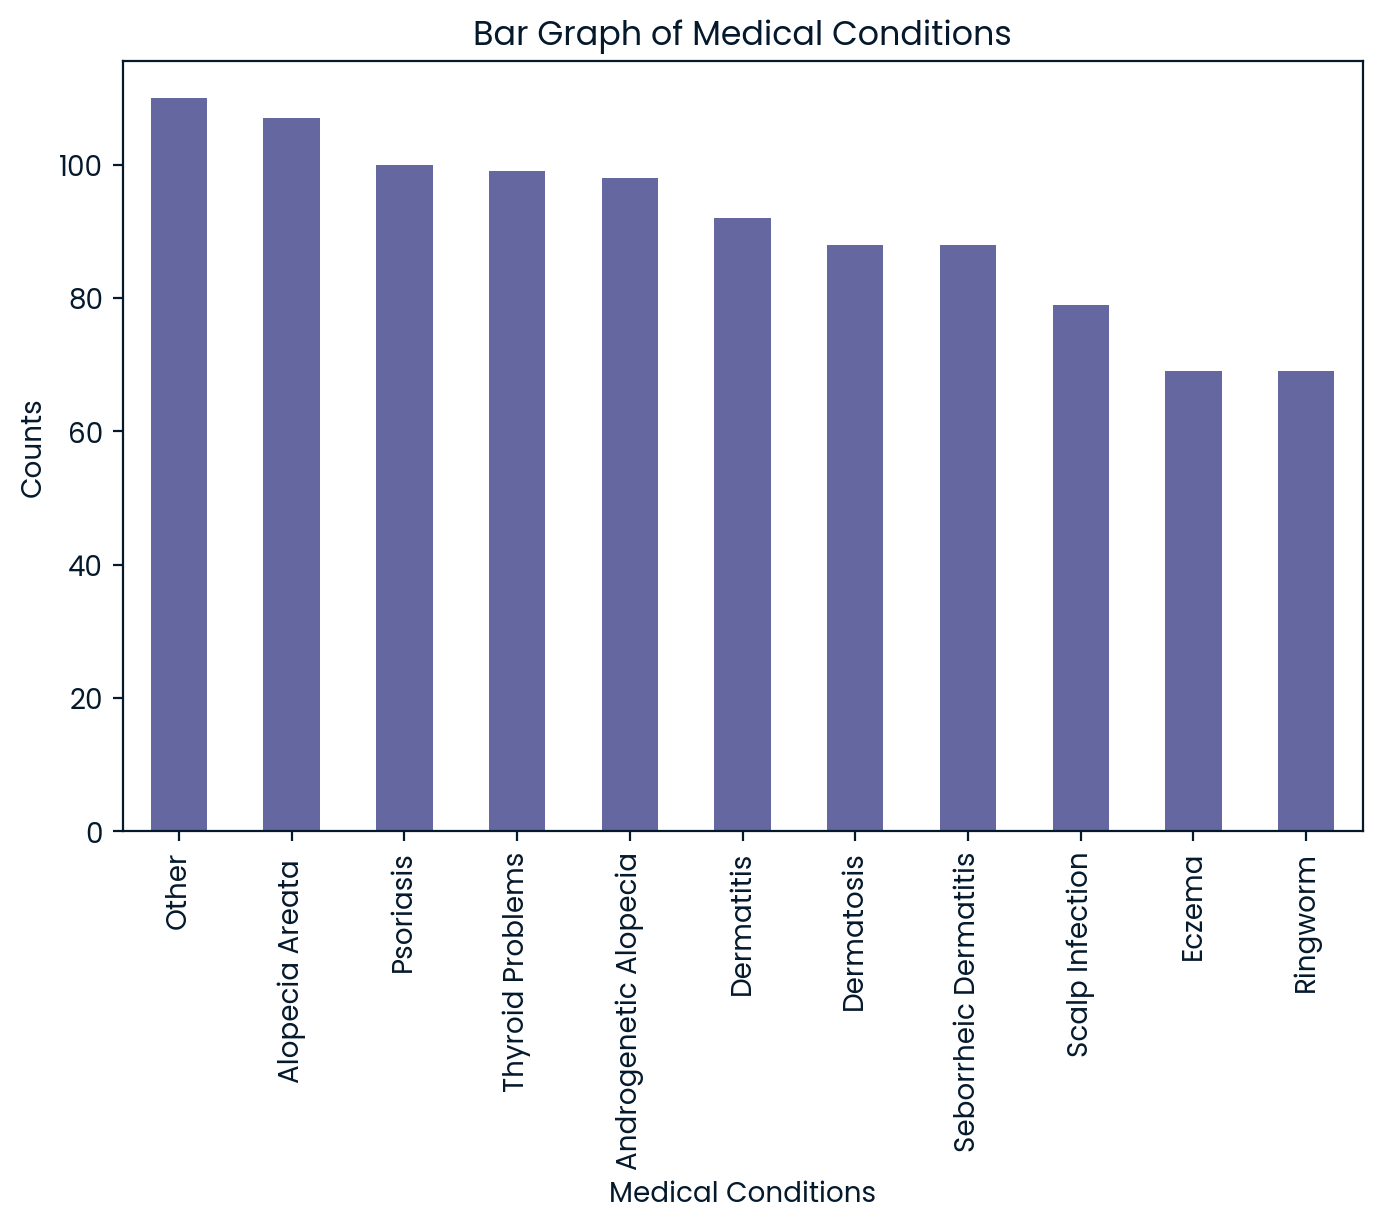

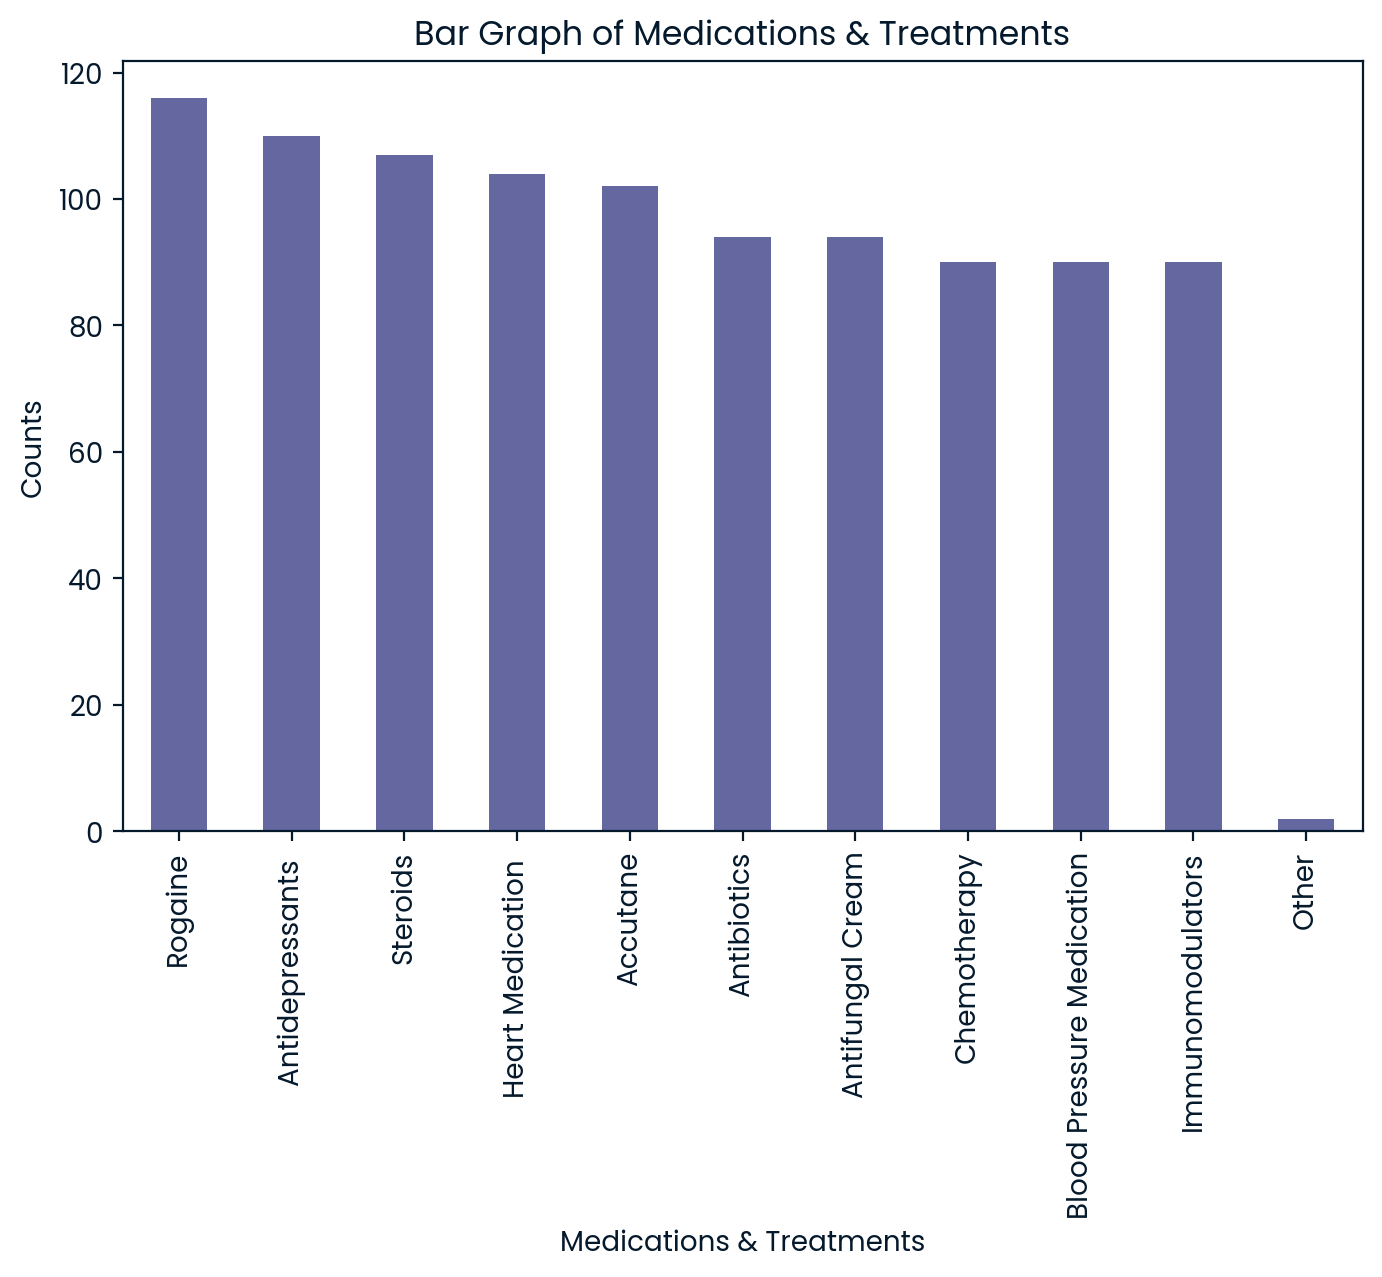

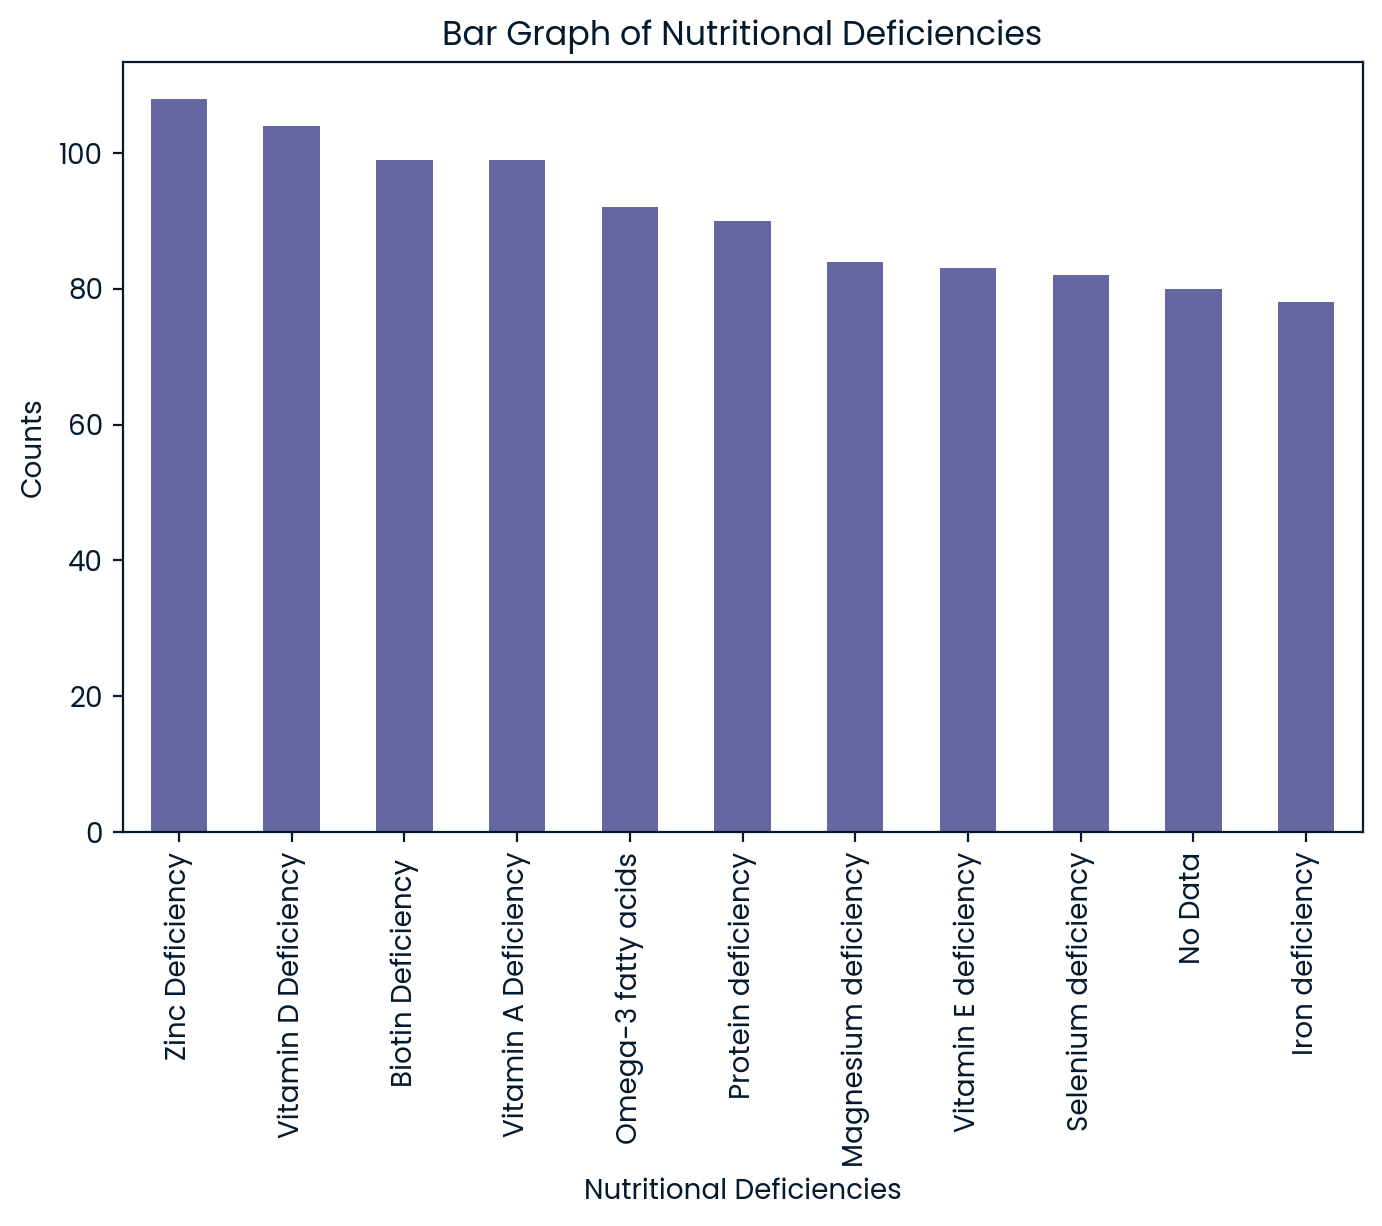

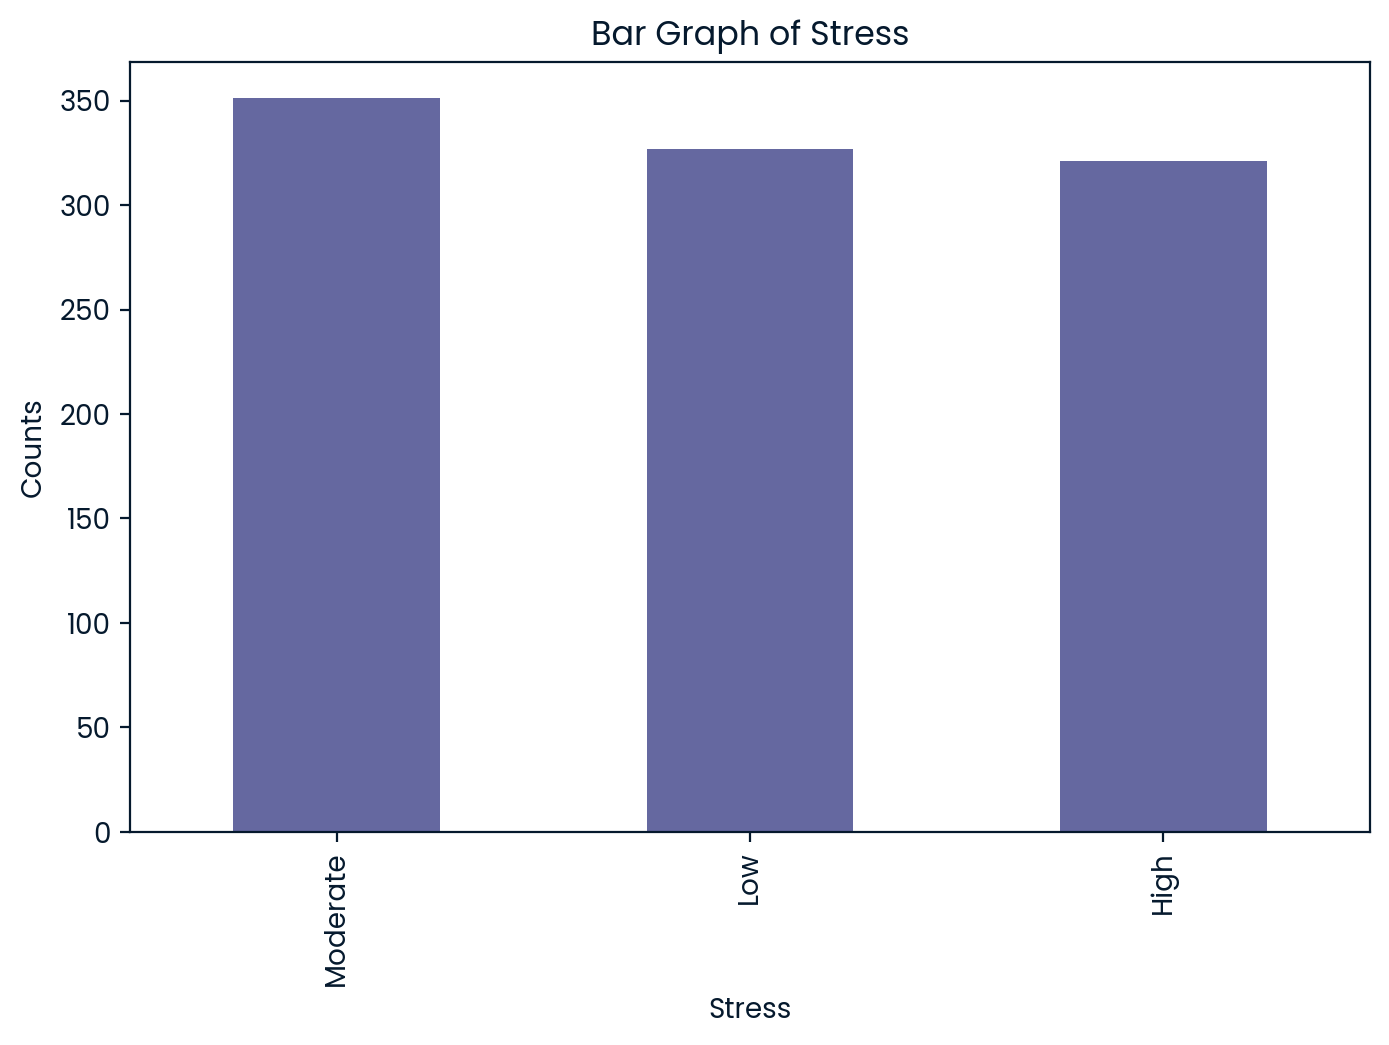

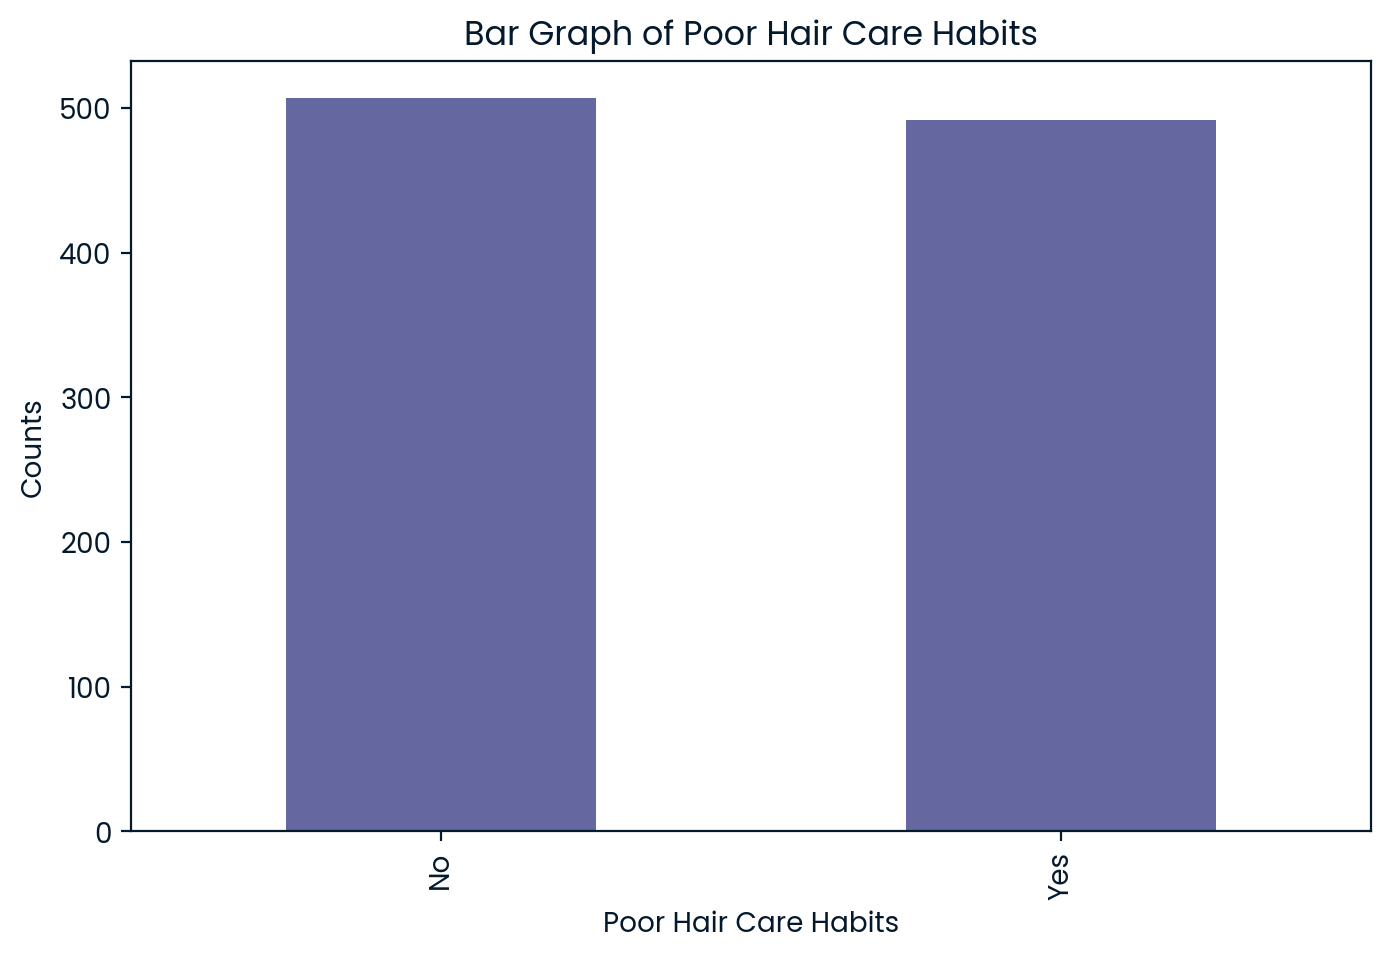

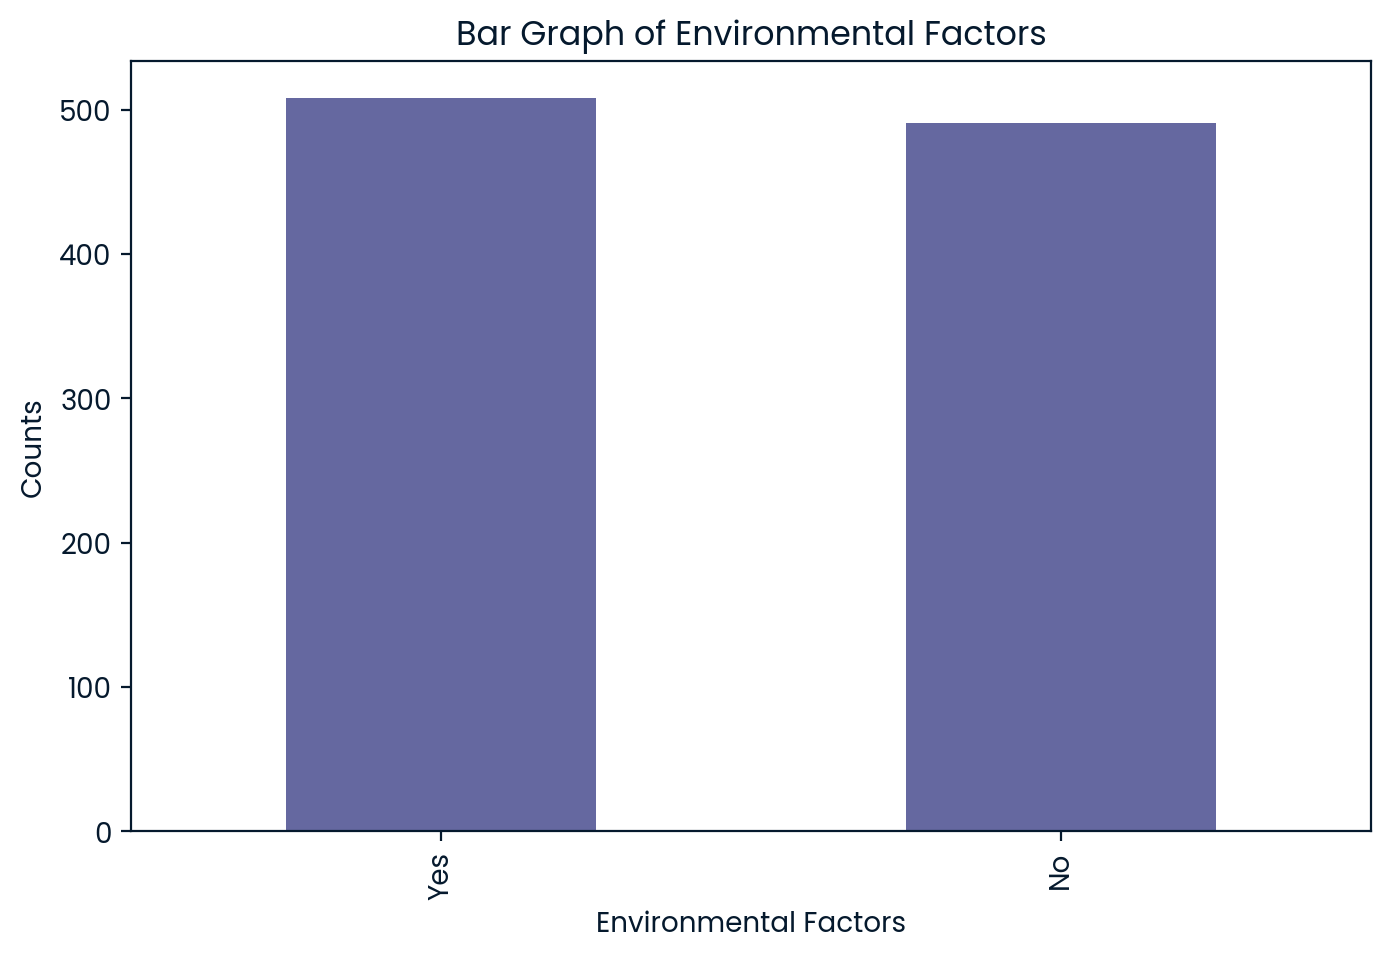

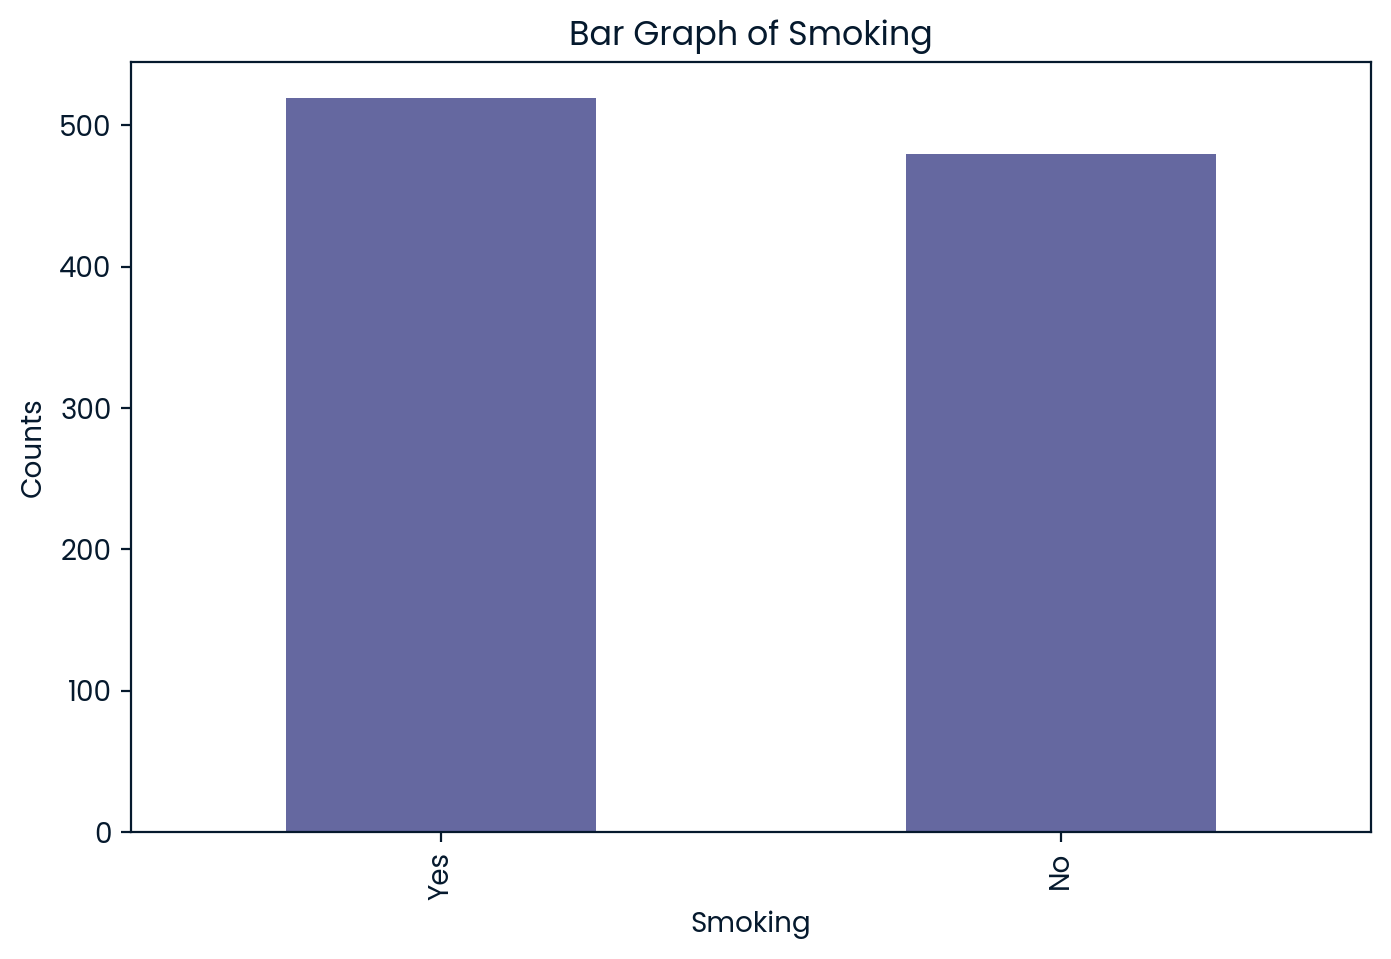

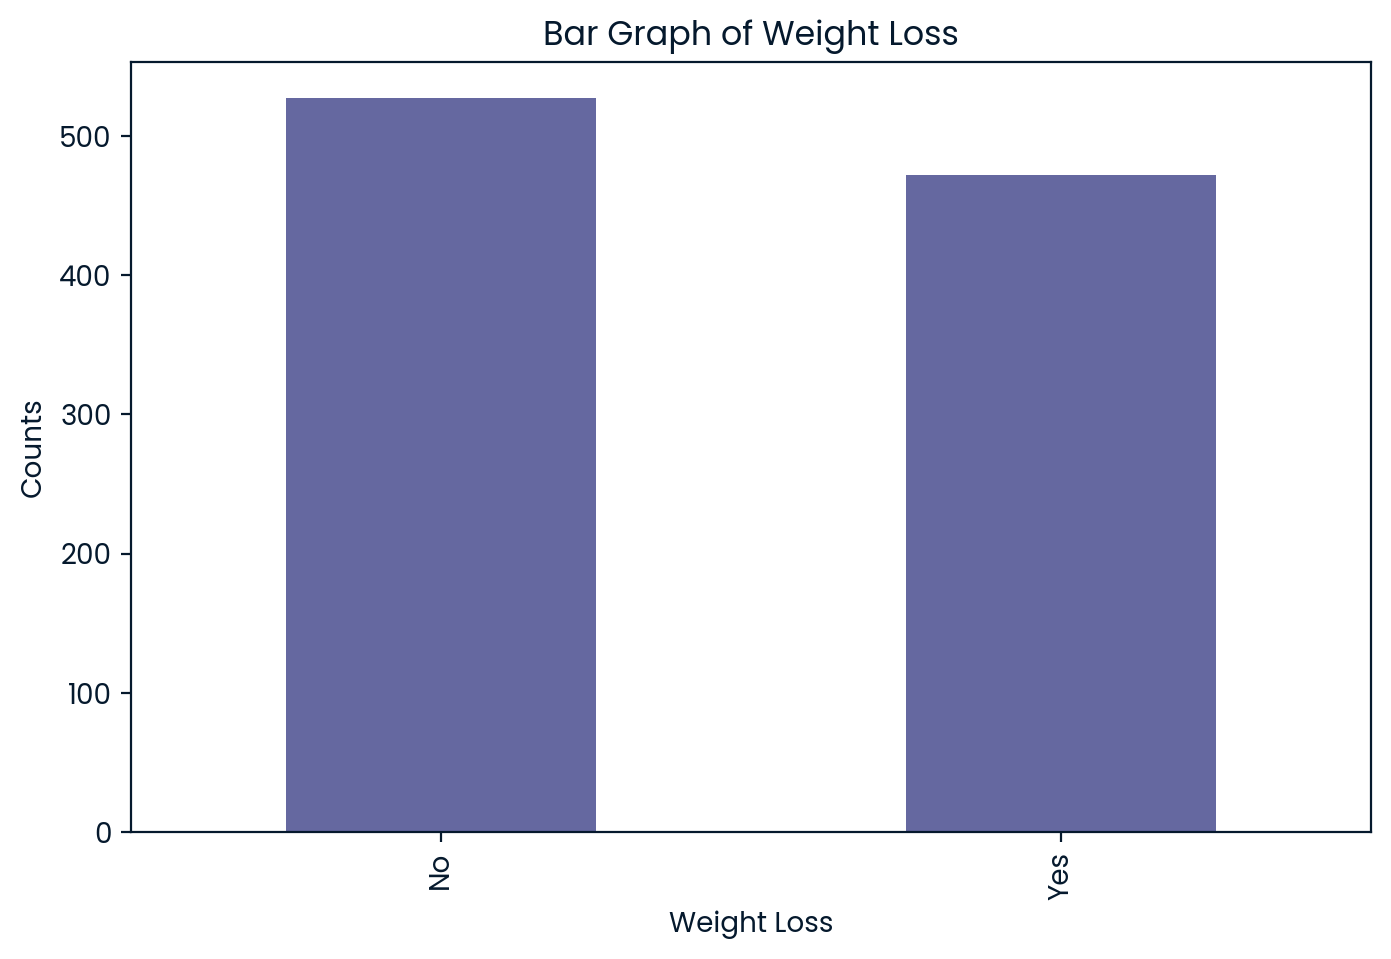

In [413]:
# plot BarGraph for the categorical values

# Identify categorical columns
categorical_columns = data.select_dtypes(include=['object', 'category']).columns

#plot the categorical columns
import seaborn as sns
import matplotlib.pyplot as plt

# Plot bar graphs for each categorical column
for col in categorical_columns:
    # Count the occurrences of each category
    counts = data[col].value_counts()
    
    # Create the bar graph
    plt.figure(figsize=(8, 5))
    counts.plot(kind='bar')
    
    # Adding labels and title
    plt.xlabel(col)
    plt.ylabel('Counts')
    plt.title(f'Bar Graph of {col}')
    
    # Display the bar graph
    plt.show()

For Medical Conditions, We initially replaced "No Data" with "Other". Looking at the values in bargraph shows that it has the highest counts. In "Medications and treatments" column, the count of "other" is significanlty lower. This has to be carefully treated. Other than that, everything else seems okay. The proportion for each values looks good. In most cases, if the proportion are not equal, bootstrapping or recollection of data should be done. For this case, we don't have to. Thank god. 

CLUSTER ANALYSIS WITH EUCLIDEAN DISTANCE

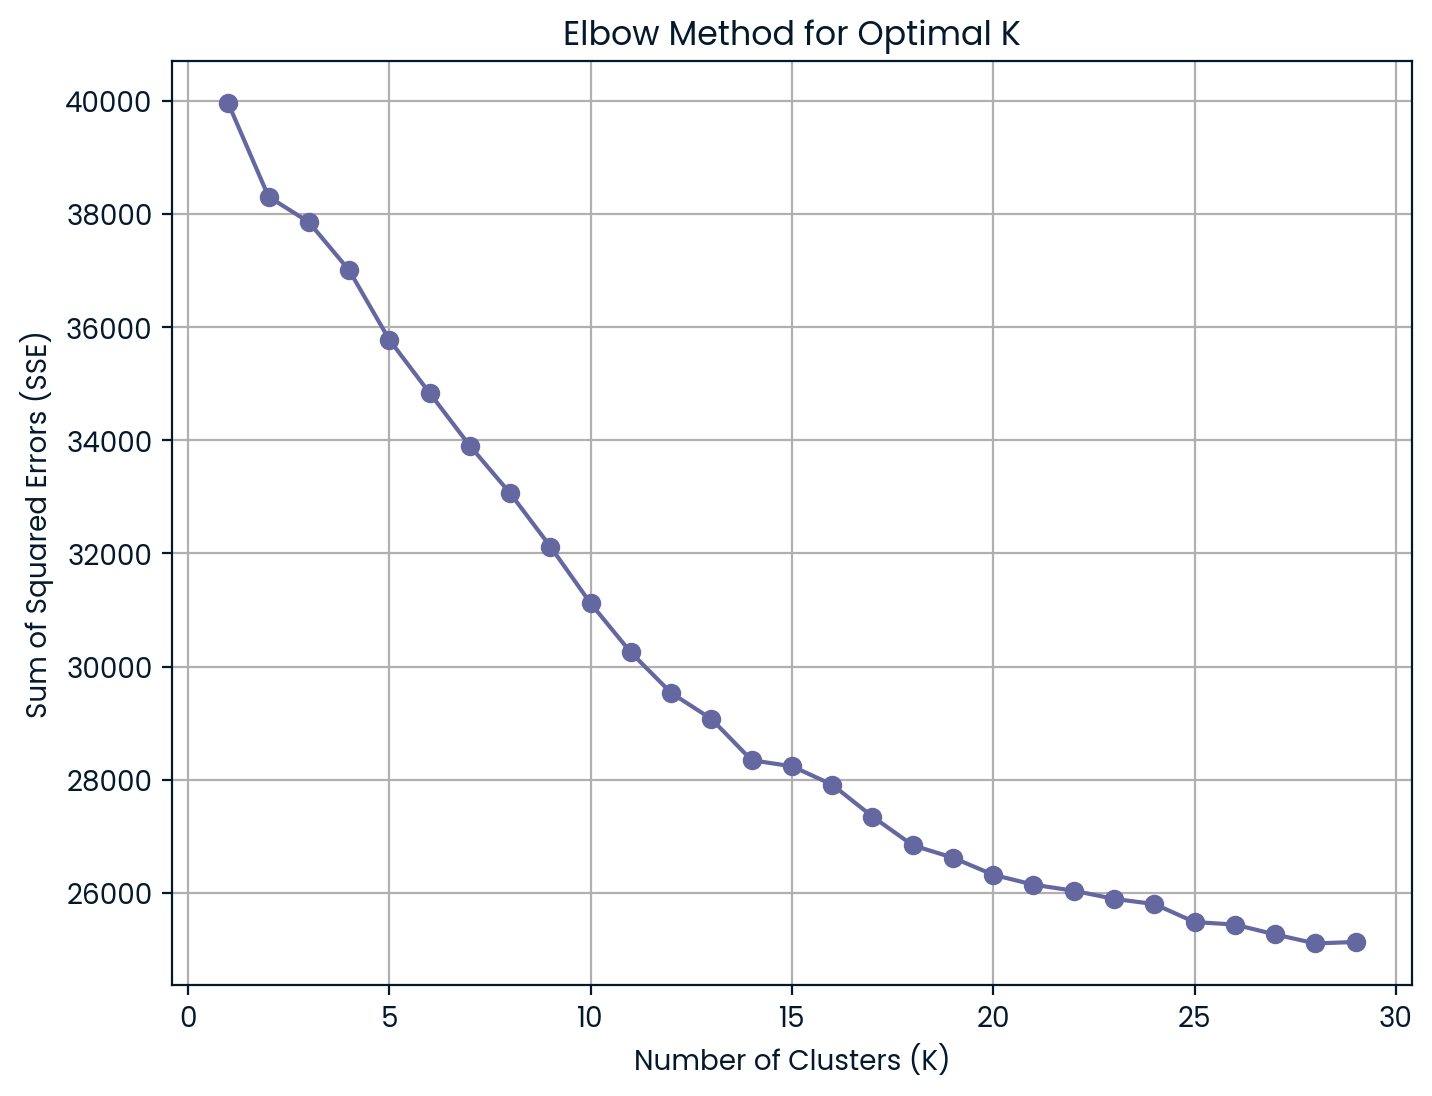

In [414]:
# Load data (assuming 'data' is a DataFrame with the provided columns)
# Convert categorical variables to dummy variables
data_dummies = pd.get_dummies(
    data,
    columns=['Hormonal Changes', 'Medical Conditions', 'Medications & Treatments',
             'Nutritional Deficiencies', 'Stress', 'Poor Hair Care Habits', 
             'Environmental Factors', 'Smoking', 'Weight Loss', 'Genetics'],
    drop_first=True  # Drop the first category to avoid multicollinearity
)

# Include 'Id' in the DataFrame for reference but exclude it from clustering features
# Select features for clustering, including 'Age' and the dummies created
features = ['Age'] + [col for col in data_dummies.columns if col not in ['Id', 'Hair Loss']]  # Exclude 'Id' and 'Hair Loss'
X = data_dummies[features]

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Determine optimal number of clusters using Elbow Method
sse = []
k_range = range(1, 30)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X_scaled)
    sse.append(kmeans.inertia_)

# Plotting the Elbow Curve
plt.figure(figsize=(8, 6))
plt.plot(k_range, sse, marker='o')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Sum of Squared Errors (SSE)")
plt.title("Elbow Method for Optimal K")
plt.grid()
plt.show()


In [415]:
# Fit KMeans with the optimal number of clusters (3 in this case)
optimal_k = 2
kmeans = KMeans(n_clusters=optimal_k, random_state=0)
data_dummies['Cluster'] = kmeans.fit_predict(X_scaled)

# Display the first few rows to confirm the clusters have been assigned
print(data_dummies.head())


       Id  Age  Hair Loss  ...  Weight Loss_Yes  Genetics_Yes  Cluster
0  133992   19          0  ...            False          True        1
1  148393   43          0  ...            False         False        0
2  155074   26          0  ...             True         False        1
3  118261   46          0  ...            False          True        0
4  111915   30          1  ...            False         False        1

[5 rows x 42 columns]


In [416]:
# Step 1: Cross-tabulation of clusters and hair loss status
cluster_hair_loss = pd.crosstab(data_dummies['Cluster'], data_dummies['Hair Loss'], margins=True)
cluster_hair_loss.columns = ['No Hair Loss', 'Hair Loss', 'Total']

# Step 2: Calculate percentages of hair loss within each cluster
cluster_hair_loss['% Hair Loss'] = (cluster_hair_loss['Hair Loss'] / cluster_hair_loss['Total']) * 100

# Step 3: Calculate average age per cluster
average_age = data_dummies.groupby('Cluster')['Age'].mean()
average_age = average_age.rename("Average Age")

# Step 4: Combine average age with the cross-tabulation results
cluster_hair_loss = cluster_hair_loss.join(average_age)


# Step 10: Formatting the DataFrame for better readability
cluster_hair_loss = cluster_hair_loss.style.format({
    'No Hair Loss': '{:.0f}',
    'Hair Loss': '{:.0f}',
    'Total': '{:.0f}',
    '% Hair Loss': '{:.2f}%',
    'Average Age': '{:.2f}'
})

# Step 11: Highlight the row with index 5
def highlight_row(row):
    return ['background-color: yellow' if row.name == 4 else '' for _ in row]

# Apply highlighting to the DataFrame by row
cluster_hair_loss = cluster_hair_loss.apply(highlight_row, axis=1)

# Display the final formatted results
cluster_hair_loss


,No Hair Loss,Hair Loss,Total,% Hair Loss,Average Age
Cluster,,,,,
0,279,254,533,47.65%,41.61
1,223,243,466,52.15%,25.70
All,502,497,999,49.75%,nan


Based on cluster analysism, the sudden change in slope occurs at second cluster. Cluster 2 with an average age of 25 years old has the hair loss percentage of 52.15%, higher than for another group 41 years old.

In [417]:
# Perform proportion test for all categorical variables with clusters 


In [418]:
# Get id and cluster grouping from data_dummies
grouping = data_dummies[['Id', 'Cluster']]

# Perform left join with the main data using Id
final_data = data.merge(grouping, on='Id', how='left')

cluster_0_data = final_data[final_data['Cluster'] == 0]
cluster_1_data = final_data[final_data['Cluster'] == 1]

My approach to further analysis is: fit a random forest model then use variable importance method to identify important variables.

In [419]:
# Separate features and target variable
data_final = cluster_0_data.copy()
data_final = data_final.drop('Cluster', axis=1)


X = data_final.drop(columns=['Hair Loss', 'Id'])  # Drop 'Hair Loss' and 'Id'
y = data_final['Hair Loss']

# Identify categorical columns
categorical_cols = X.select_dtypes(include=['object', 'category']).columns

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a ColumnTransformer to handle categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ],
    remainder='passthrough'  # Leave the rest of the columns untouched
)

# Create a pipeline that includes the preprocessor and a classifier
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Train the model
pipeline.fit(X_train, y_train)

# Make predictions on the test set
y_pred = pipeline.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("\nClassification Report:\n", report)


Accuracy: 0.4444444444444444

Classification Report:
               precision    recall  f1-score   support

           0       0.46      0.60      0.52        55
           1       0.41      0.28      0.33        53

    accuracy                           0.44       108
   macro avg       0.44      0.44      0.43       108
weighted avg       0.44      0.44      0.43       108



Accuracy using the entire model is just 46%. This is quite low. Maybe tuning can be help. 

I am not satisfied with 47.5% accuracy. I will test the individual parameters and how they are contributing to accuracy.

In [420]:
def evaluate_hyperparameter(data, hyperparam_name, hyperparam_values, test_size=0.2, random_state=42, cv=5):
    """
    Evaluates the effect of a specified hyperparameter on the accuracy of a RandomForestClassifier.
    Includes cross-validation to reduce overfitting.

    Parameters:
    - data: pandas DataFrame, the dataset containing features and target.
    - hyperparam_name: str, the name of the hyperparameter to evaluate.
    - hyperparam_values: list, values of the hyperparameter to test.
    - test_size: float, proportion of the data to use for testing.
    - random_state: int, random state for reproducibility.
    - cv: int, number of folds for cross-validation.

    Outputs:
    - A plot showing the effect of the hyperparameter on training and validation accuracy.
    """
    # Separate features and target variable
    X = data.drop(columns=['Hair Loss', 'Id'])  # Replace 'Hair Loss' with your actual target column name
    y = data['Hair Loss']
    
    # Identify categorical columns
    categorical_cols = X.select_dtypes(include=['object', 'category']).columns
    
    # Split the dataset into training and validation sets
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=test_size, random_state=random_state)
    
    # Create ColumnTransformer for categorical data
    preprocessor = ColumnTransformer(
        transformers=[
            ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
        ],
        remainder='passthrough'
    )
    
    # Track accuracy for each hyperparameter value
    train_accuracies = []
    val_accuracies = []
    
    # Loop over specified hyperparameter values
    for value in hyperparam_values:
        # Define classifier with the current hyperparameter value
        classifier_params = {hyperparam_name: value, 'random_state': random_state, 'min_samples_split': 5, 'min_samples_leaf': 3}
        classifier = RandomForestClassifier(**classifier_params)
        
        # Create a pipeline with preprocessor and classifier
        pipeline = Pipeline(steps=[
            ('preprocessor', preprocessor),
            ('classifier', classifier)
        ])
        
        # Train the model
        pipeline.fit(X_train, y_train)
        
        # Predict and calculate accuracy for training set using cross-validation
        train_accuracy = np.mean(cross_val_score(pipeline, X_train, y_train, cv=cv, scoring='accuracy'))
        train_accuracies.append(train_accuracy)
        
        # Predict and calculate accuracy for validation set
        y_val_pred = pipeline.predict(X_val)
        val_accuracy = accuracy_score(y_val, y_val_pred)
        val_accuracies.append(val_accuracy)
    
    # Plot hyperparameter vs. accuracy for both training and validation sets
    plt.figure(figsize=(10, 6))
    plt.plot(hyperparam_values, train_accuracies, marker='o', linestyle='-', color='b', label='Training Accuracy (CV)')
    plt.plot(hyperparam_values, val_accuracies, marker='o', linestyle='-', color='r', label='Validation Accuracy')
    plt.title(f'Effect of {hyperparam_name} on Model Accuracy')
    plt.xlabel(hyperparam_name)
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)
    plt.show()

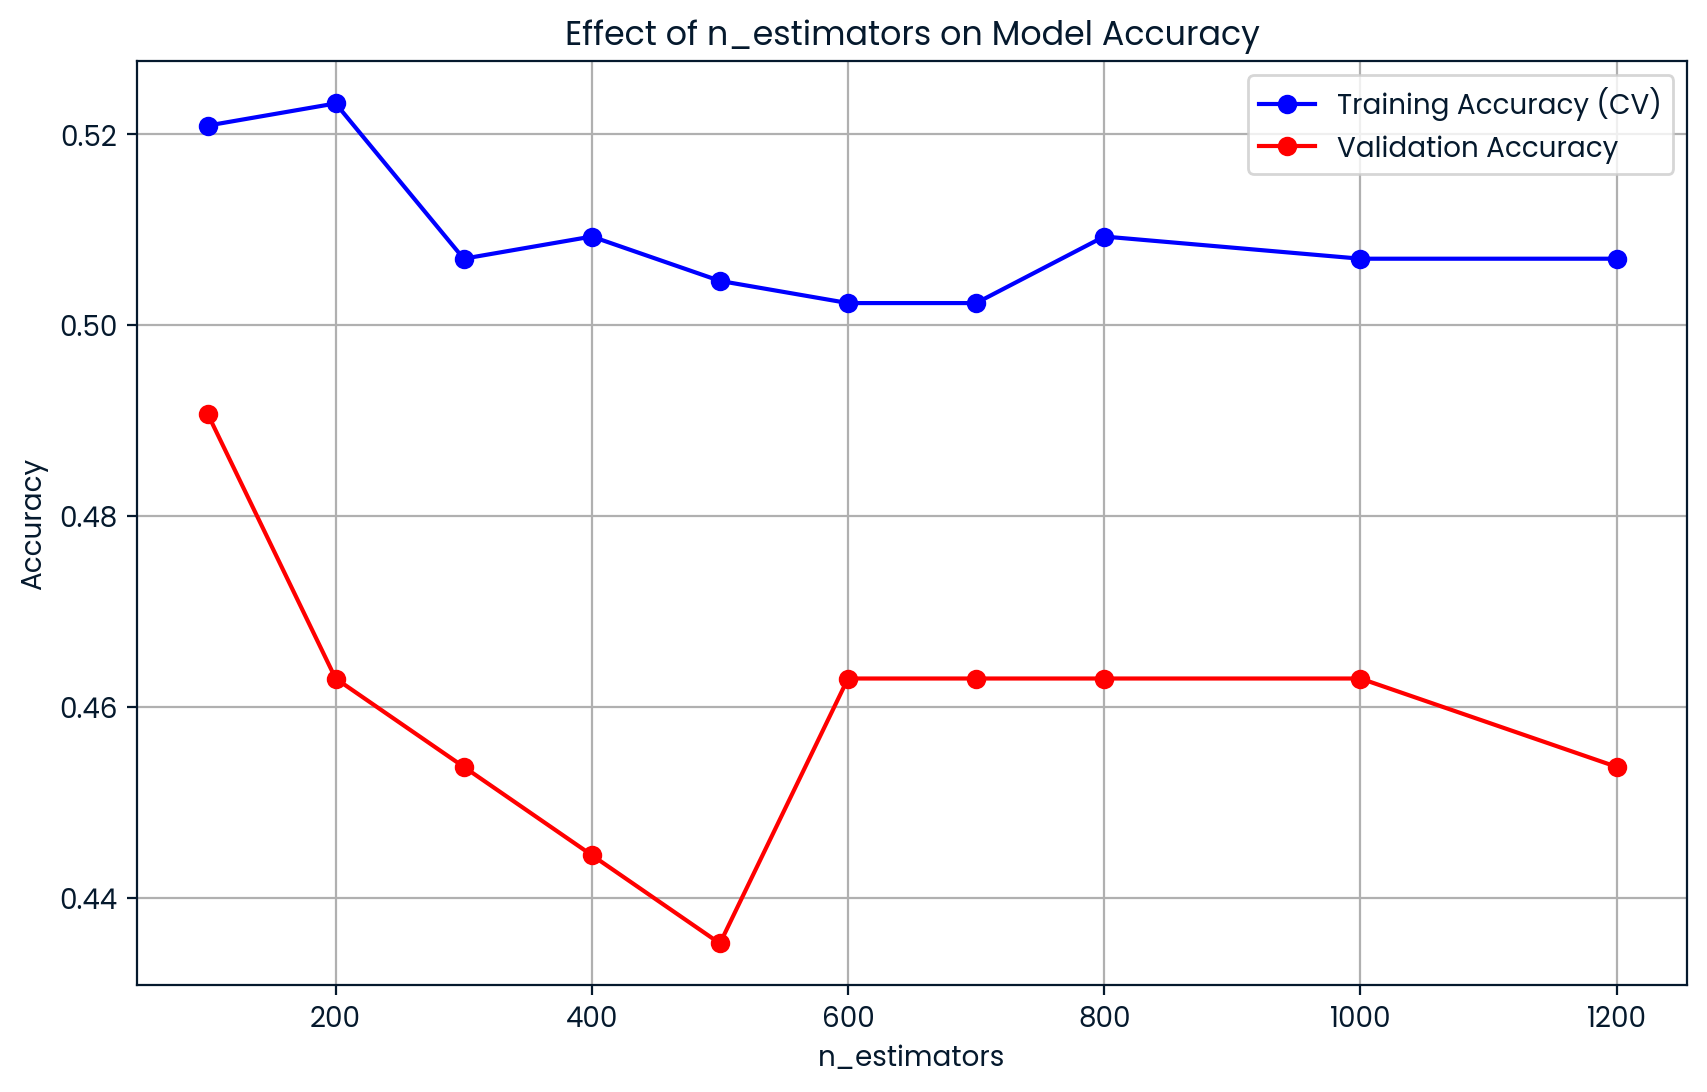

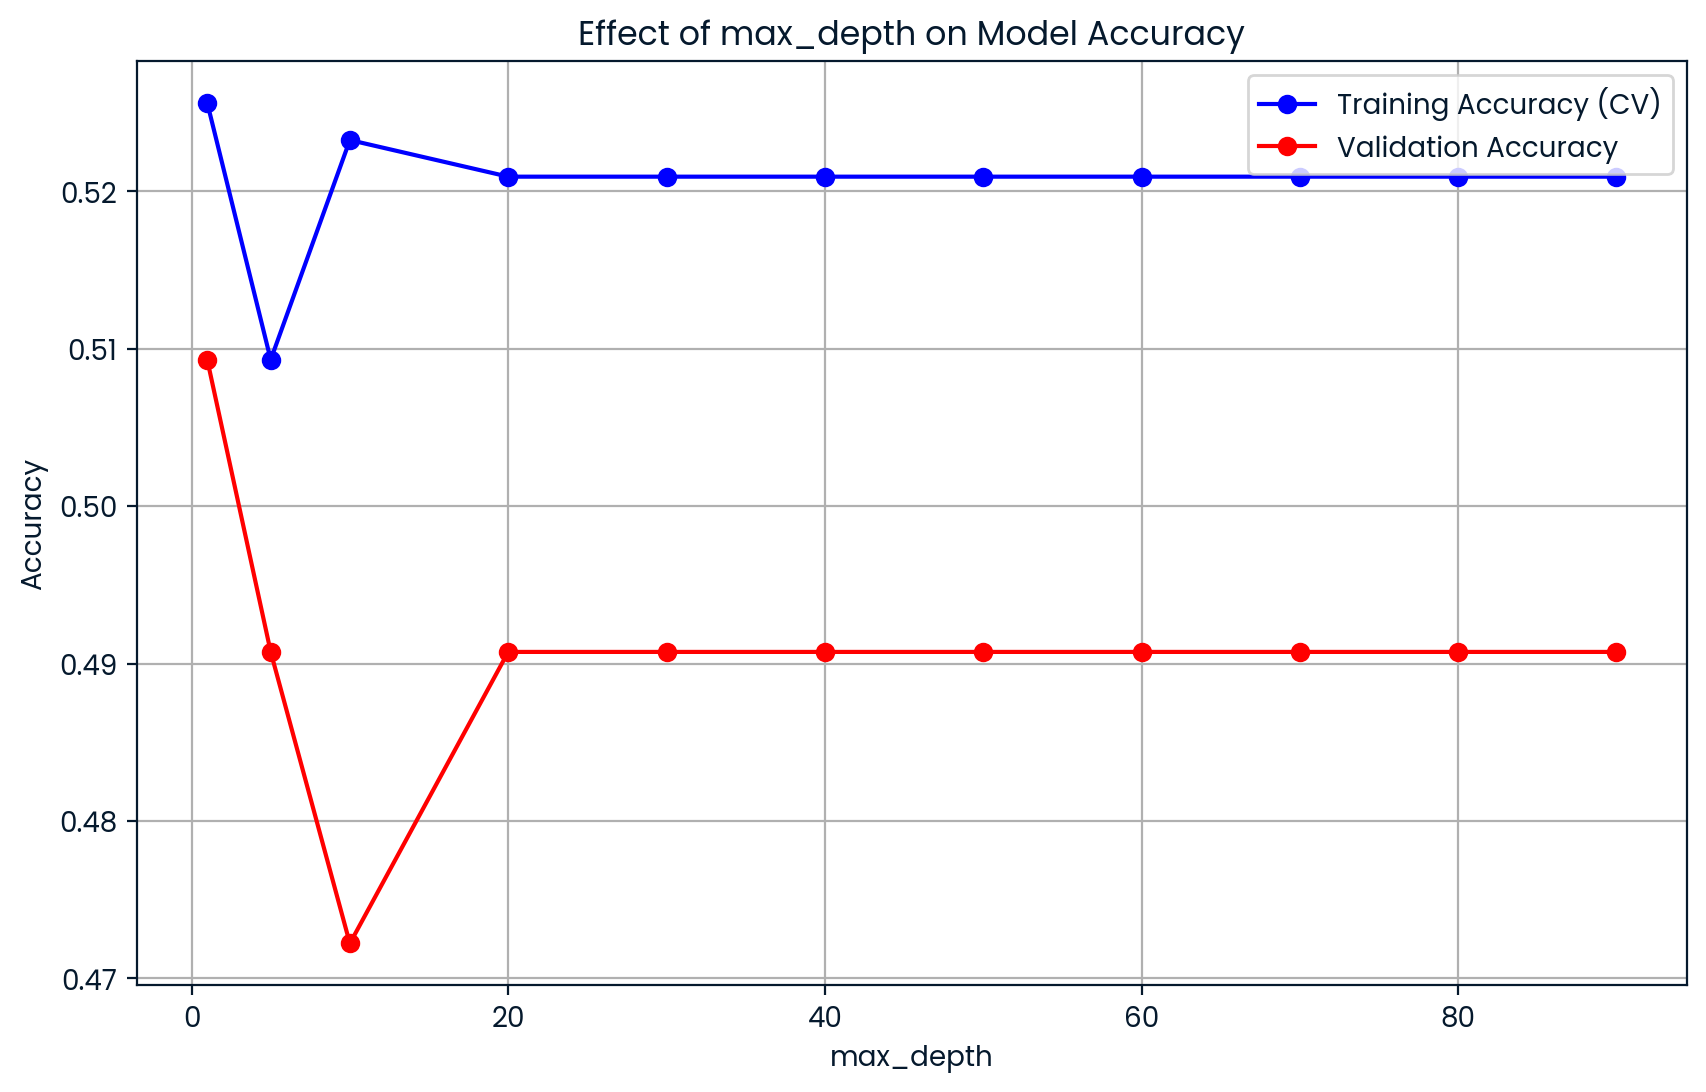

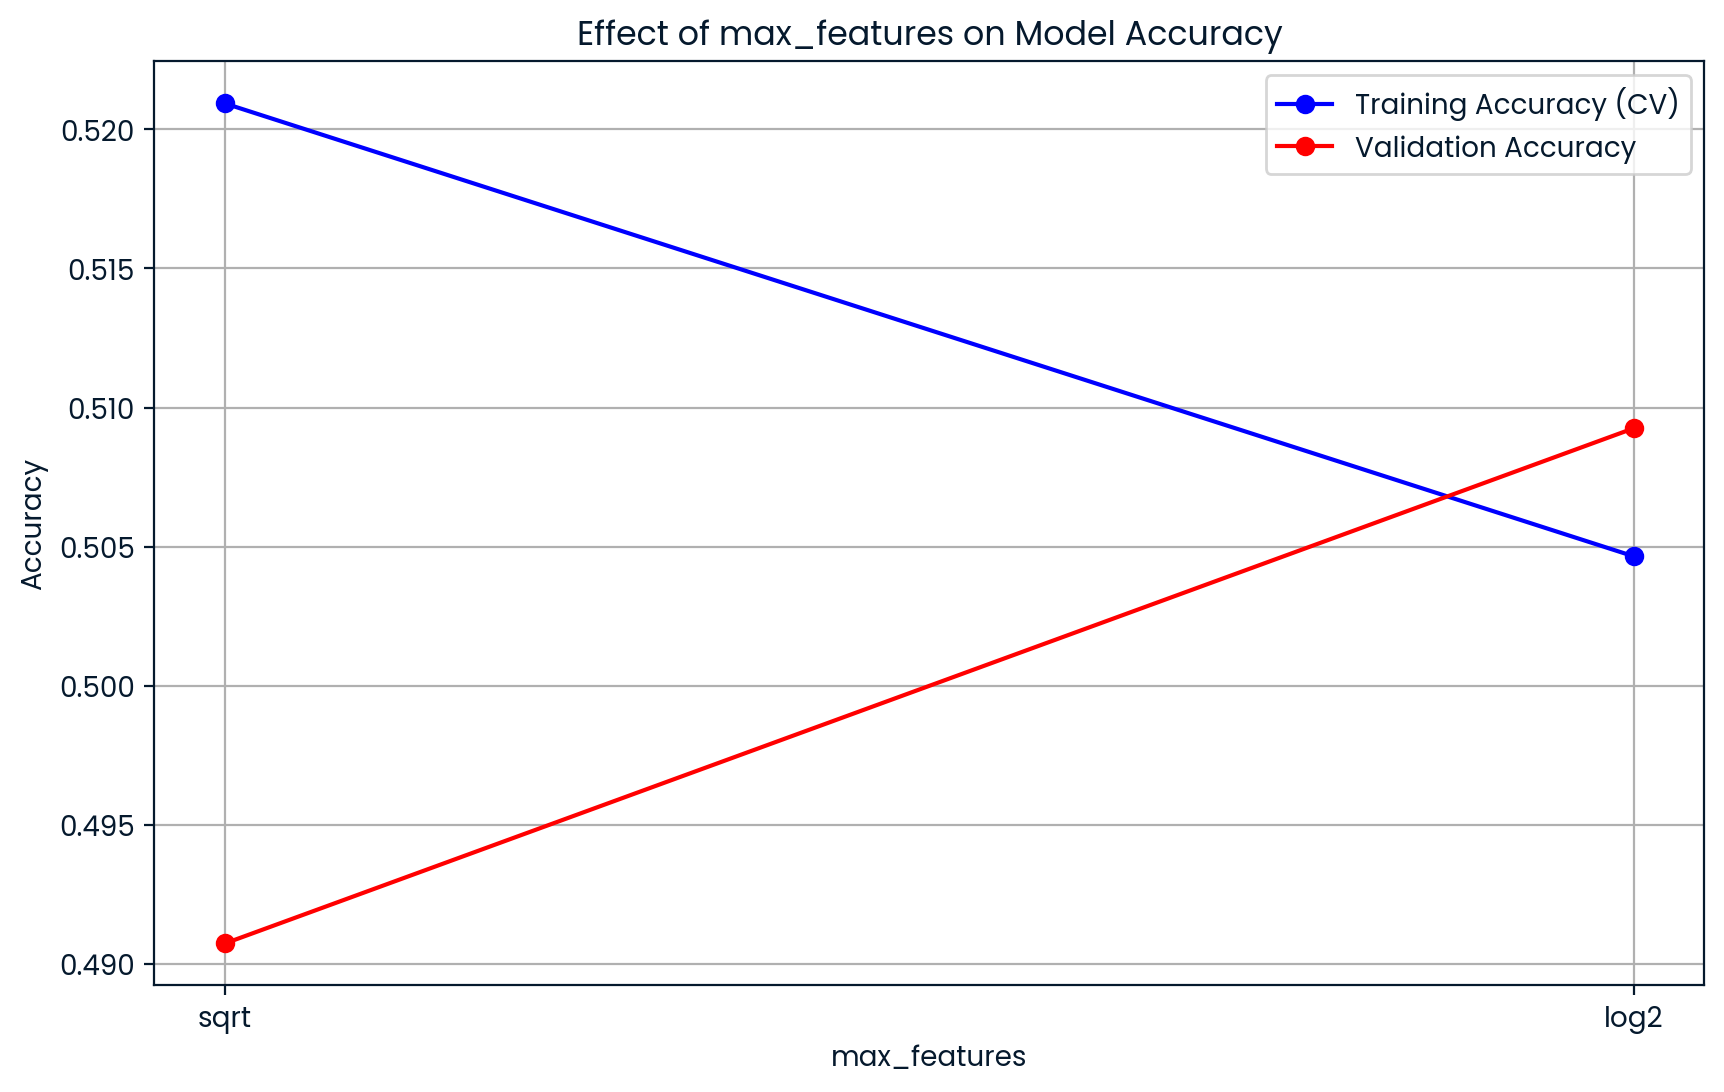

In [421]:
# Example usage
# Test the effect of 'n_estimators'
evaluate_hyperparameter(data_final, hyperparam_name='n_estimators', hyperparam_values=[100, 200, 300, 400, 500, 600, 700, 800, 1000, 1200])

# Test the effect of 'max_depth'
evaluate_hyperparameter(data_final, hyperparam_name='max_depth', hyperparam_values=[1, 5, 10, 20, 30, 40, 50, 60, 70, 80, 90])

# Test the effect of 'max_features'
evaluate_hyperparameter(data_final, hyperparam_name='max_features', hyperparam_values=['sqrt', 'log2'])


Based on the plots above, points that closer to eacher other( for example look at max_features model accuracy), using log2 would reduce the distance between validation and training accuracy. That point has to be taken into consideration becuase it reduces overfitting or underfitting cases.

In [422]:
# Define the hyperparameters to tune for RandomForestClassifier
param_grid = {
    'classifier__n_estimators': [50, 100],        # Number of trees
    'classifier__max_depth': [1, 5],            # Max depth of trees
    'classifier__min_samples_split': [5],        # Min samples per split
    'classifier__min_samples_leaf': [4],          # Min samples per leaf
    'classifier__max_features': ['log2'],       # Features to consider when splitting
}

# Set up GridSearchCV with the pipeline
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)

# Run grid search on the training data
grid_search.fit(X_train, y_train)

# Best parameters from grid search
print("Best Hyperparameters:", grid_search.best_params_)

# Evaluate the tuned model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# print accuracy and report
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("\nClassification Report:\n", report)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
Best Hyperparameters: {'classifier__max_depth': 1, 'classifier__max_features': 'log2', 'classifier__min_samples_leaf': 4, 'classifier__min_samples_split': 5, 'classifier__n_estimators': 100}
Accuracy: 0.5185185185185185

Classification Report:
               precision    recall  f1-score   support

           0       0.51      0.98      0.68        55
           1       0.67      0.04      0.07        53

    accuracy                           0.52       108
   macro avg       0.59      0.51      0.37       108
weighted avg       0.59      0.52      0.38       108



In [423]:
# Plot Feature Importances
# Extract feature importances from the best model
feature_importances = best_model.named_steps['classifier'].feature_importances_

# Get feature names after transformation
feature_names = best_model.named_steps['preprocessor'].transformers_[0][1].get_feature_names_out(categorical_cols)

# If you have other non-categorical features, you should concatenate their names
# Assuming remaining features are in the same order as they were in X
remaining_features = X_train.drop(columns=categorical_cols).columns
all_feature_names = np.concatenate([feature_names, remaining_features])

# Create a DataFrame for feature importance
importance_df = pd.DataFrame({'Feature': all_feature_names, 'Importance': feature_importances})

# Sort by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Optional: Print the DataFrame for a tabular view of feature importances
print("\nFeature Importances:\n", importance_df)


Feature Importances:
                                               Feature  Importance
43                                         Smoking_No        0.08
1                                        Genetics_Yes        0.07
47                                                Age        0.05
42                          Environmental Factors_Yes        0.05
41                           Environmental Factors_No        0.05
35           Nutritional Deficiencies_Zinc Deficiency        0.05
9                            Medical Conditions_Other        0.05
21         Medications & Treatments_Heart Medication         0.05
2                                 Hormonal Changes_No        0.04
13           Medical Conditions_Seborrheic Dermatitis        0.03
17          Medications & Treatments_Antidepressants         0.03
15                  Medications & Treatments_Accutane        0.03
29       Nutritional Deficiencies_Omega-3 fatty acids        0.03
22          Medications & Treatments_Immunomodulators

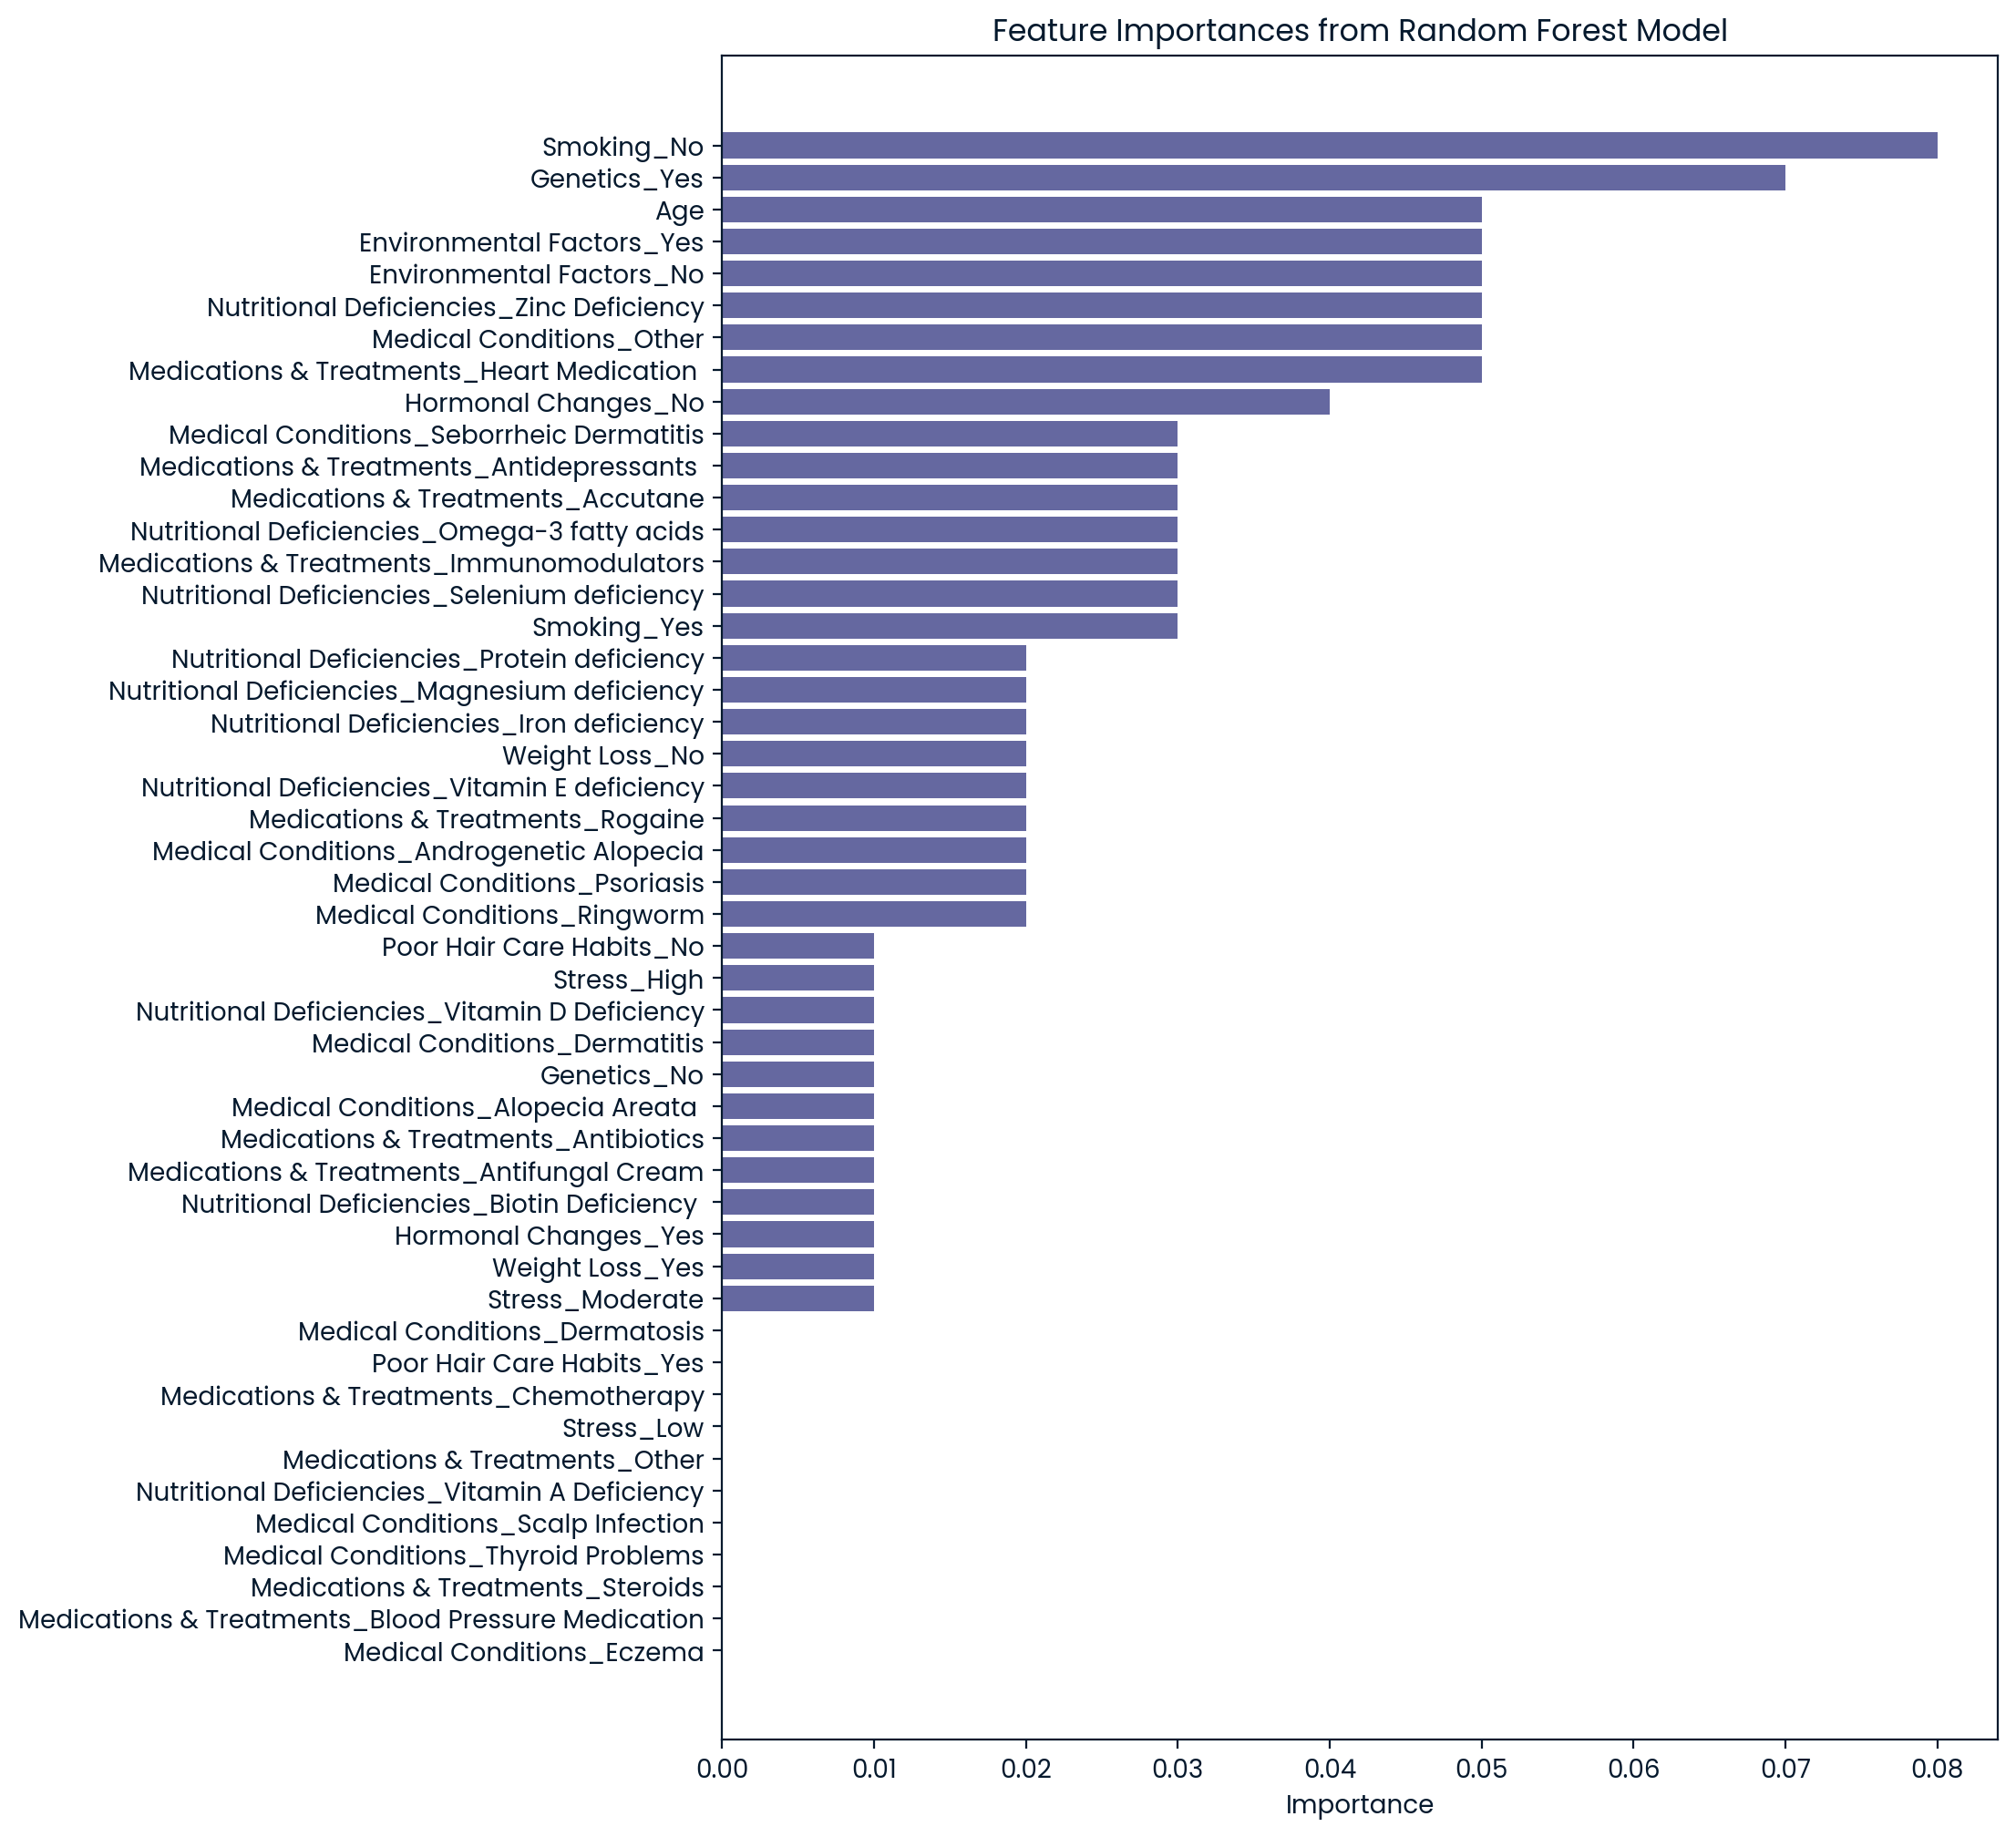

In [424]:
# Plotting feature importances with highlighted bars
plt.figure(figsize=(10, 12))  # Increase the height to 12

# Create the horizontal bar plot
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importances from Random Forest Model')
plt.gca().invert_yaxis()  # Invert y-axis to have the most important feature on top
plt.yticks(fontsize=10)  # Change the fontsize of y-ticks to improve spacing
plt.subplots_adjust(left=0.2)  # Adjust the left margin for better visibility if needed
plt.show()



Based on the Variable importance method, it is clear the age and smoking carries largest influence on whether a person has hair loss. But,  by the factor of how much ? If the person smokes cigarates, the probability of hair fall increases by how many times ? This can be explored with statistical inference methods.

In [429]:
from scipy.stats import chi2_contingency

# Ensure there are no missing values in the relevant columns
data = data_final.dropna(subset=['Smoking', 'Hair Loss'])

# Step 3: Create a Contingency Table
contingency_table = pd.crosstab(data['Smoking'], data['Hair Loss'], margins=True)
print("Contingency Table:\n", contingency_table)

# Step 4: Perform the Chi-Squared Test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Print the results
print(f"Chi-Squared Statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of Freedom: {dof}")
print("Expected Frequencies:\n", expected)

# Interpret the results
alpha = 0.05  # significance level
if p < alpha:
    print("Reject the null hypothesis: There is a significant association between smoking and hair loss.")
else:
    print("Fail to reject the null hypothesis: There is no significant association between smoking and hair loss.")

Contingency Table:
 Hair Loss    0    1  All
Smoking                 
No         101  125  226
Yes        124  119  243
All        225  244  469
Chi-Squared Statistic: 1.8849239475499533
P-value: 0.7569139180353439
Degrees of Freedom: 4
Expected Frequencies:
 [[108.42217484 117.57782516 226.        ]
 [116.57782516 126.42217484 243.        ]
 [225.         244.         469.        ]]
Fail to reject the null hypothesis: There is no significant association between smoking and hair loss.


Accuracy: 0.574468085106383

Classification Report:
               precision    recall  f1-score   support

           0       0.62      0.47      0.53        49
           1       0.54      0.69      0.61        45

    accuracy                           0.57        94
   macro avg       0.58      0.58      0.57        94
weighted avg       0.58      0.57      0.57        94



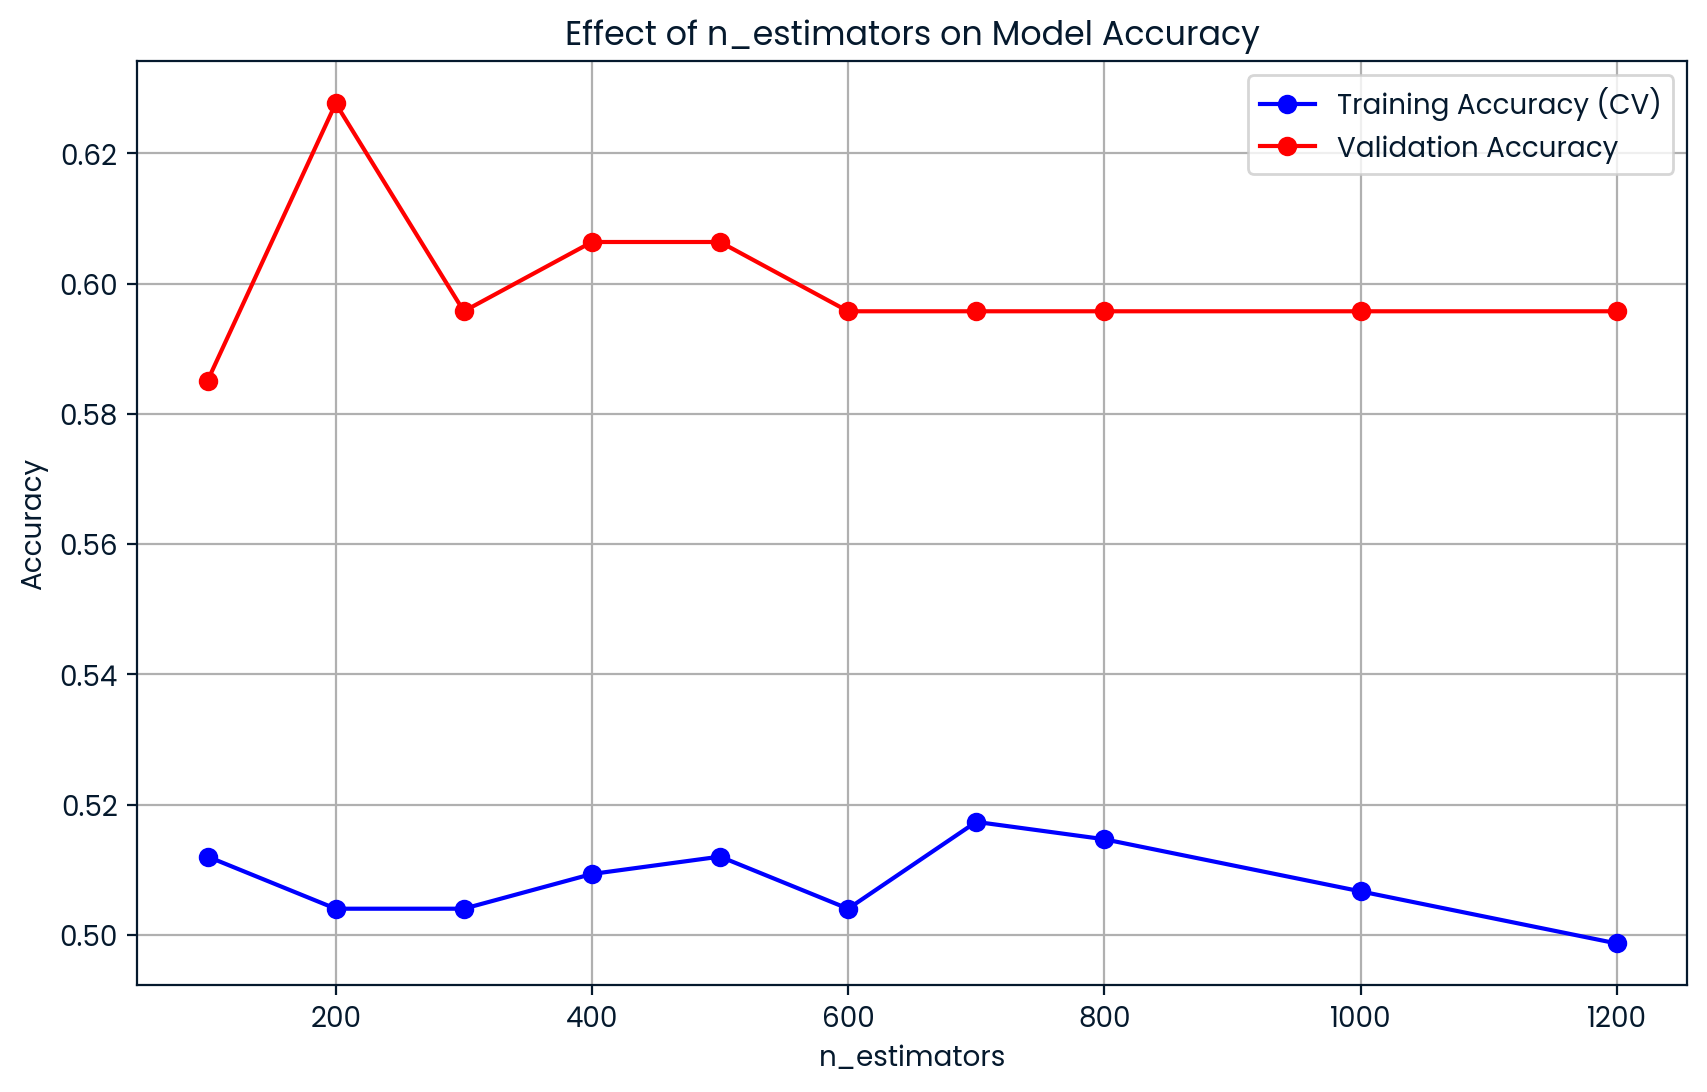

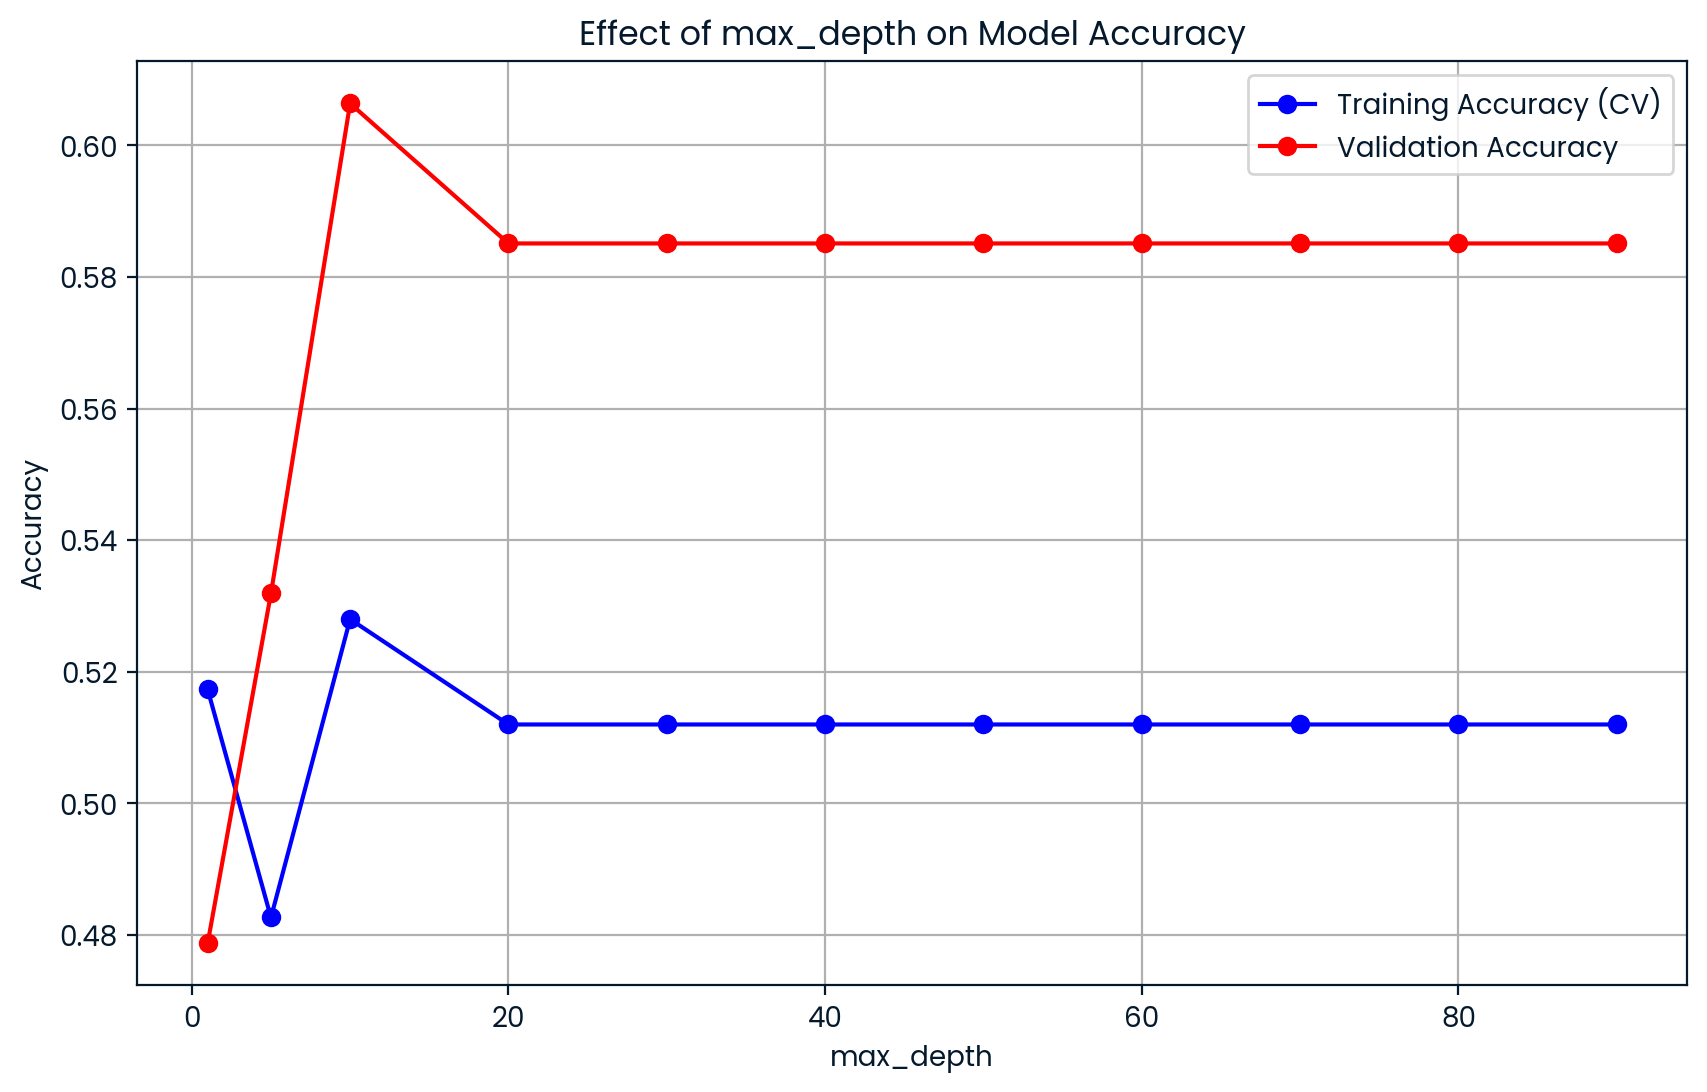

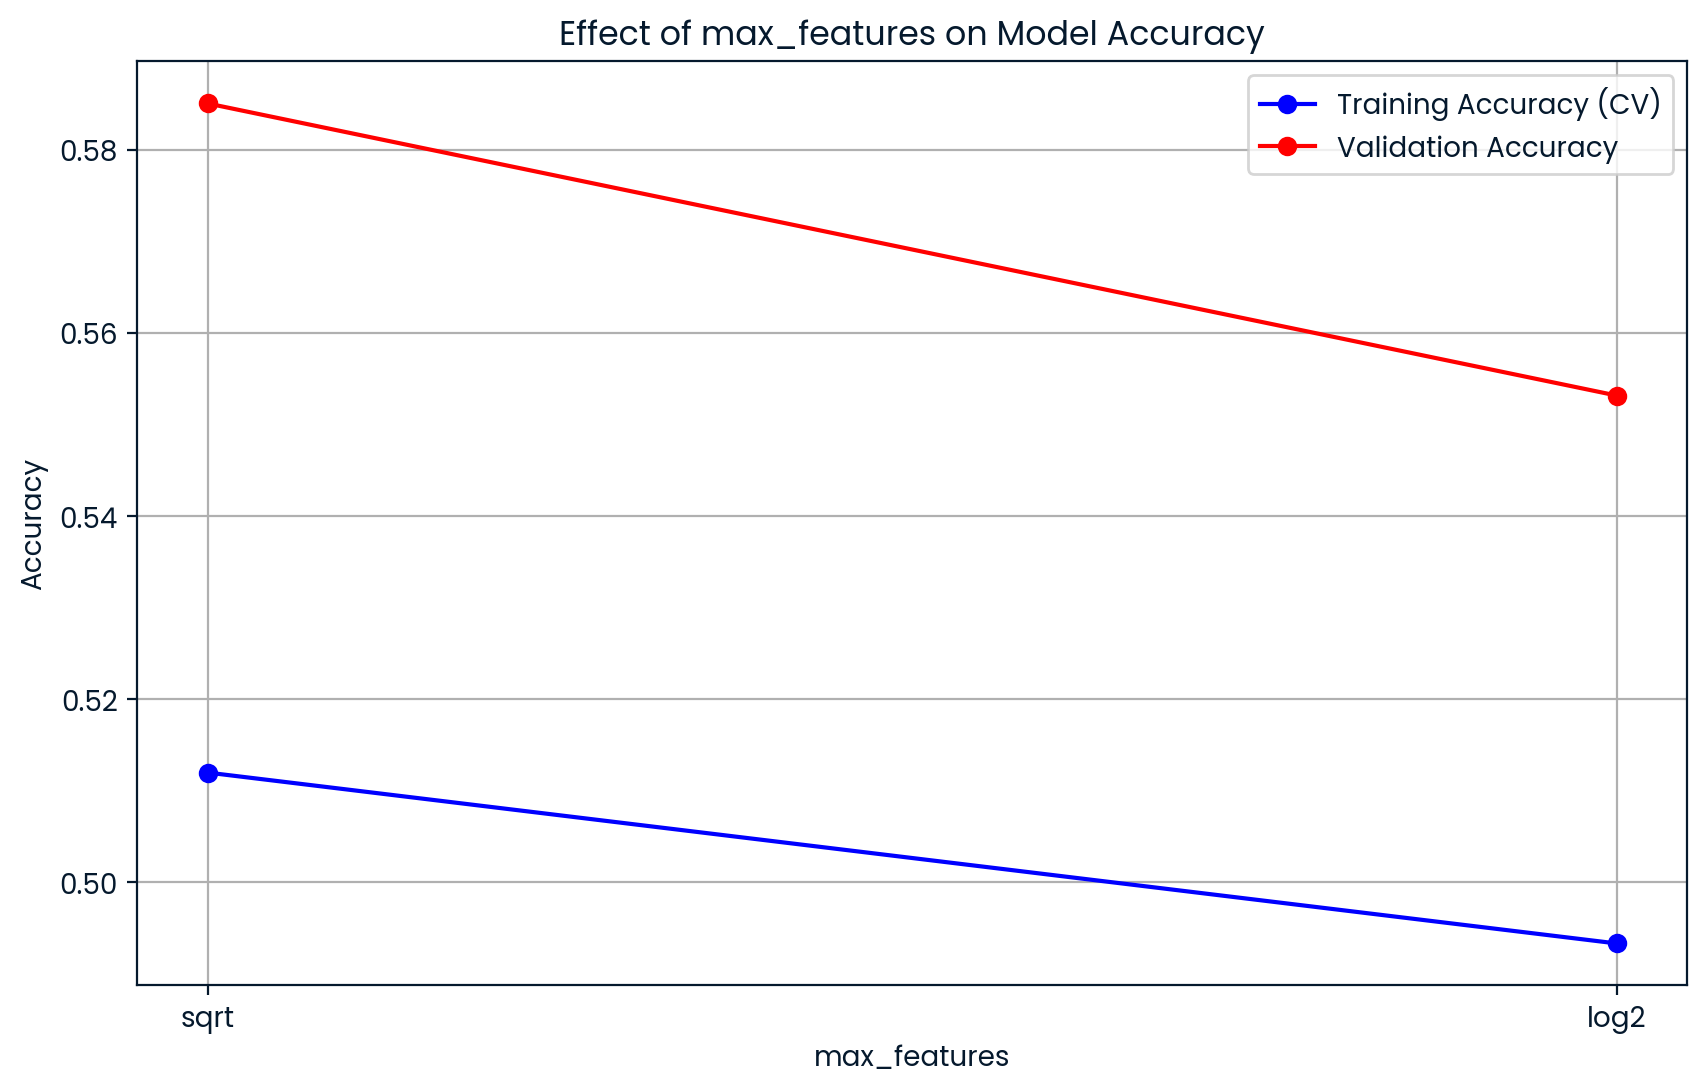

Fitting 5 folds for each of 18 candidates, totalling 90 fits
Best Hyperparameters: {'classifier__max_depth': 10, 'classifier__max_features': 'sqrt', 'classifier__n_estimators': 200}
Accuracy: 0.5851063829787234

Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.39      0.49        49
           1       0.55      0.80      0.65        45

    accuracy                           0.59        94
   macro avg       0.61      0.59      0.57        94
weighted avg       0.61      0.59      0.57        94


Feature Importances:
                                               Feature  Importance
47                                                Age    0.109692
3                                Hormonal Changes_Yes    0.029787
43                                         Smoking_No    0.027834
39                           Poor Hair Care Habits_No    0.027753
38                                    Stress_Moderate    0.027452
41                

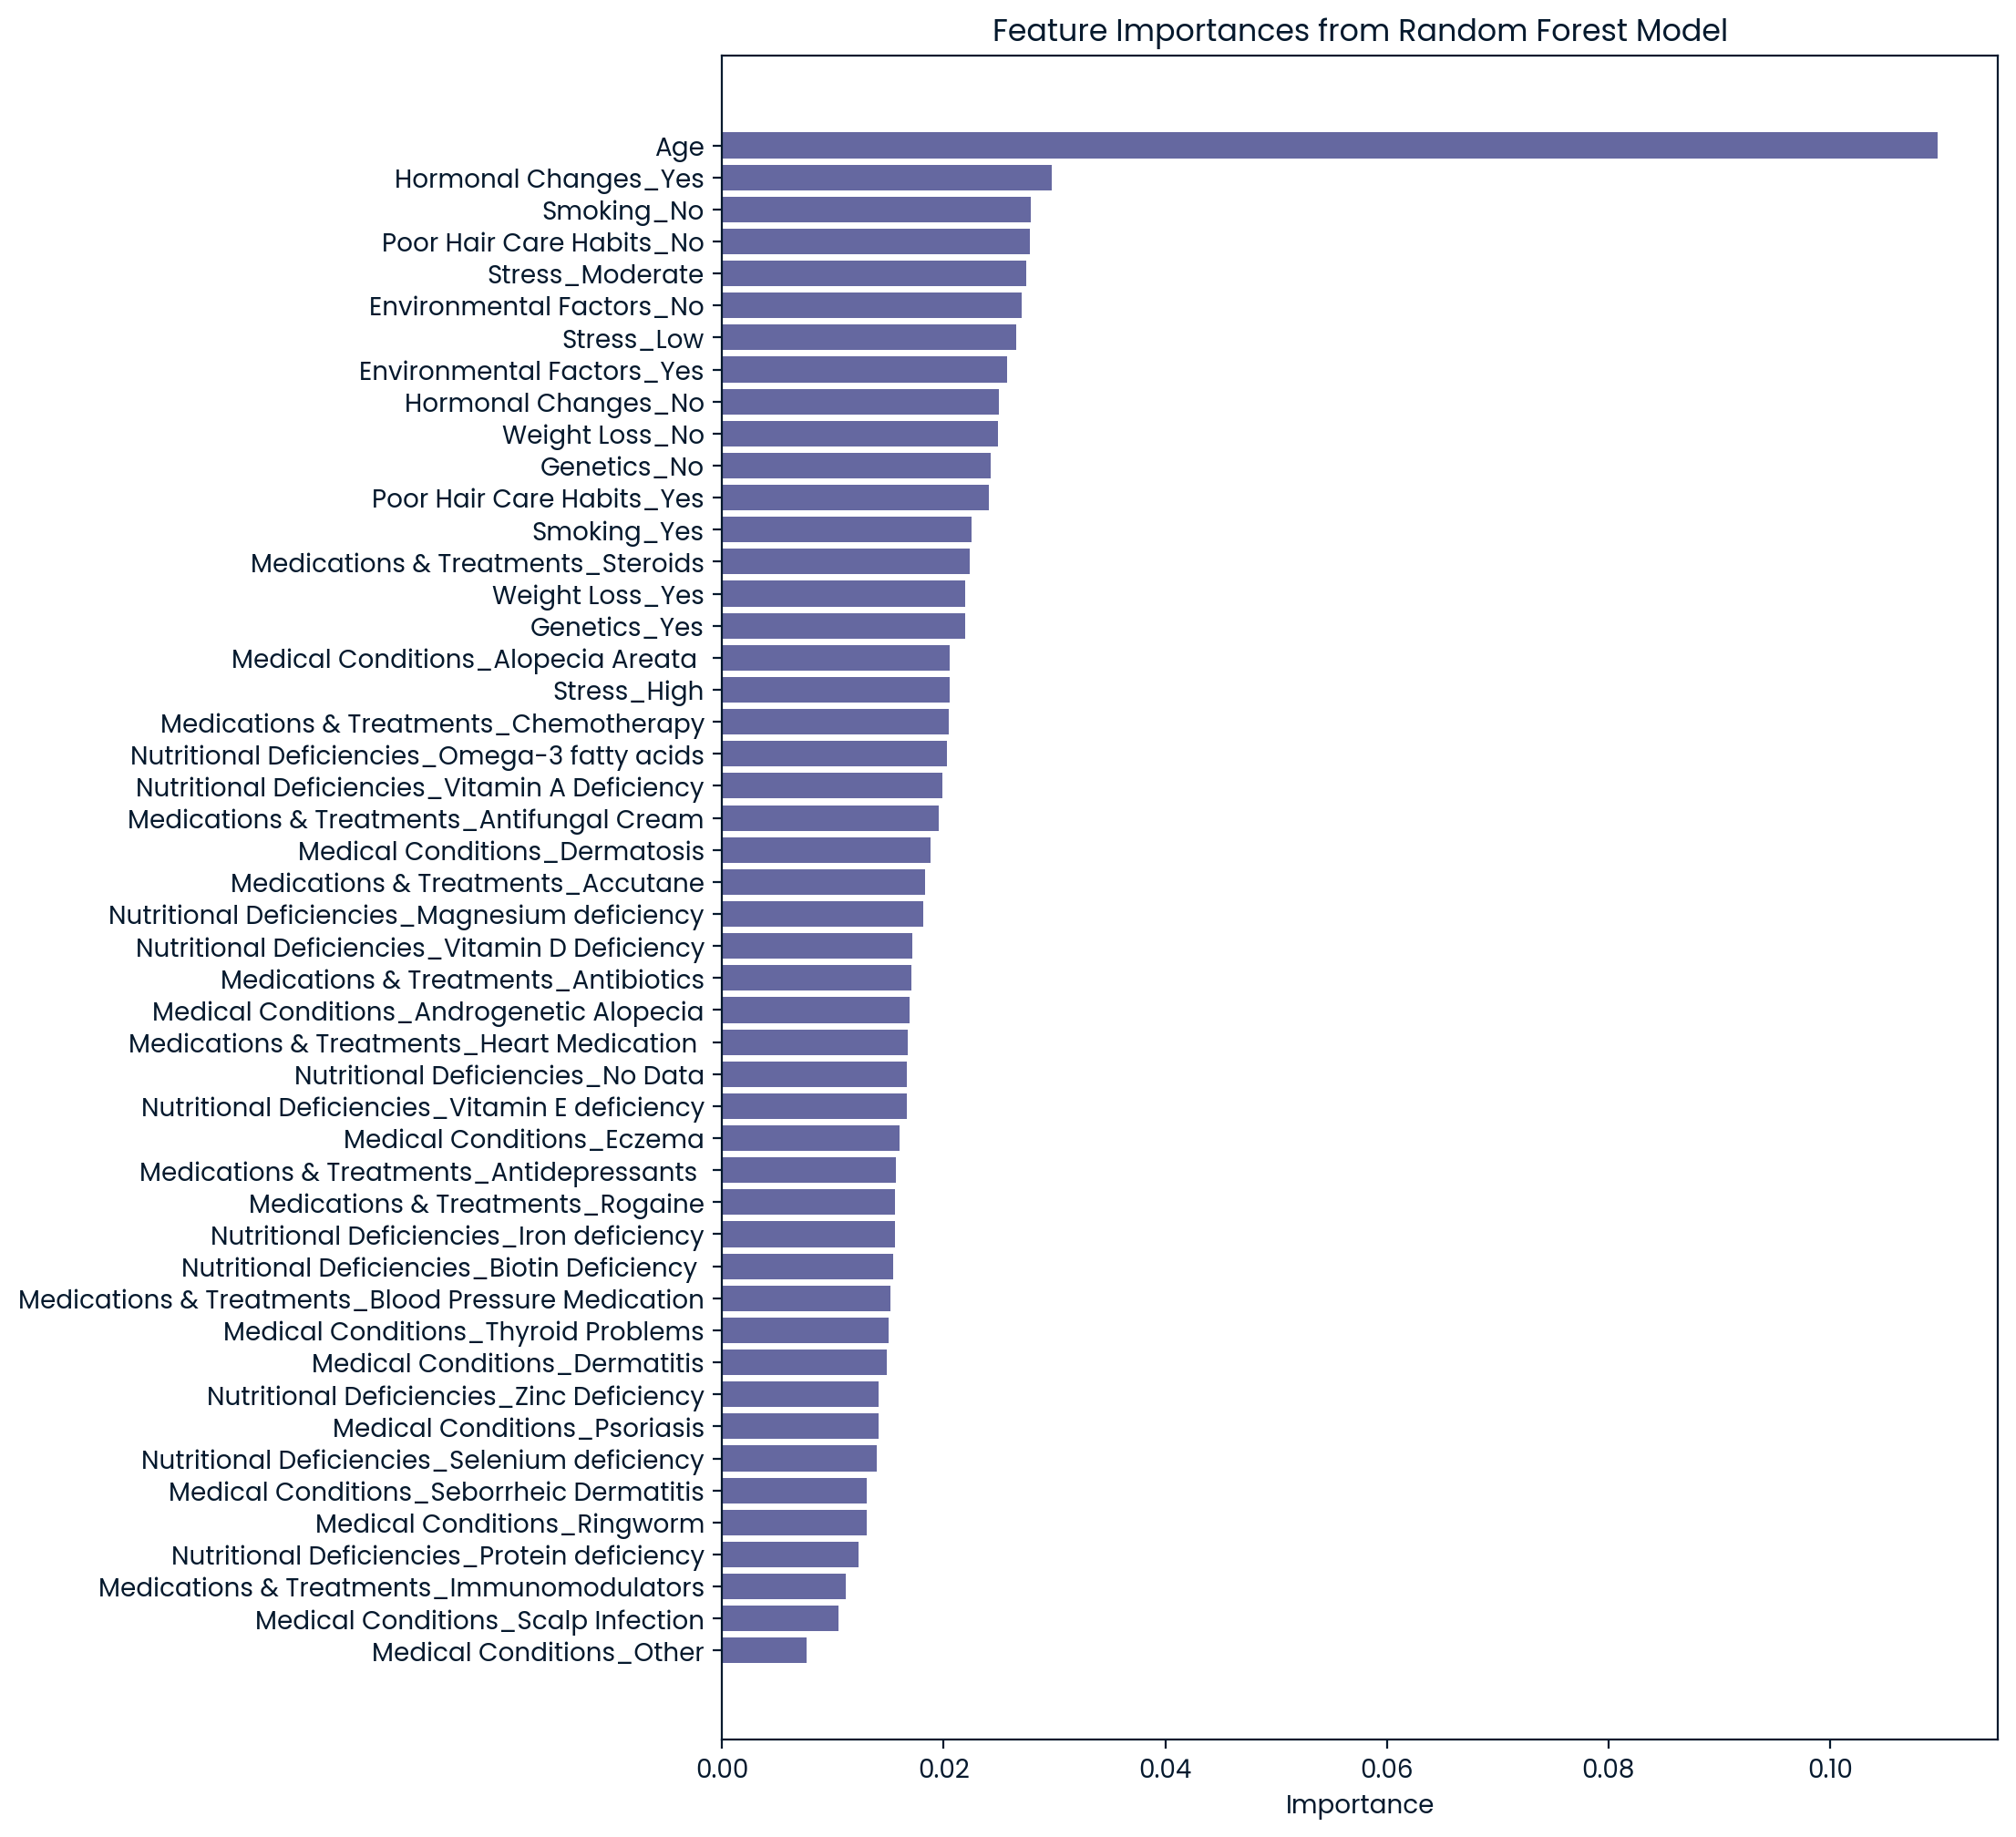

Optimization terminated successfully.
         Current function value: 0.692089
         Iterations 3


const               1.068744
Age                 1.002262
Hormonal Changes    0.919798
dtype: float64

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Hair Loss   No. Observations:                  469
Model:                          Logit   Df Residuals:                      466
Method:                           MLE   Df Model:                            2
Date:                Sun, 27 Oct 2024   Pseudo R-squ.:               0.0003425
Time:                        03:29:12   Log-Likelihood:                -324.59
converged:                       True   LL-Null:                       -324.70
Covariance Type:            nonrobust   LLR p-value:                    0.8947
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0665      0.501      0.133      0.894      -0.916       1.049
Age                  0.0023      0.019      0.121      0.903      -0.034       0.039
Hormonal Changes    -0.0836      0.185     -0.451      0.652      -0.447       0.279
====================================================================================
"""

In [430]:
# Separate features and target variable
data_final = cluster_1_data.copy()
data_final = data_final.drop('Cluster', axis=1)


X = data_final.drop(columns=['Hair Loss', 'Id'])  # Drop 'Hair Loss' and 'Id'
y = data_final['Hair Loss']

# Identify categorical columns
categorical_cols = X.select_dtypes(include=['object', 'category']).columns

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a ColumnTransformer to handle categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ],
    remainder='passthrough'  # Leave the rest of the columns untouched
)

# Create a pipeline that includes the preprocessor and a classifier
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Train the model
pipeline.fit(X_train, y_train)

# Make predictions on the test set
y_pred = pipeline.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("\nClassification Report:\n", report)

def evaluate_hyperparameter(data, hyperparam_name, hyperparam_values, test_size=0.2, random_state=42, cv=5):
    """
    Evaluates the effect of a specified hyperparameter on the accuracy of a RandomForestClassifier.
    Includes cross-validation to reduce overfitting.

    Parameters:
    - data: pandas DataFrame, the dataset containing features and target.
    - hyperparam_name: str, the name of the hyperparameter to evaluate.
    - hyperparam_values: list, values of the hyperparameter to test.
    - test_size: float, proportion of the data to use for testing.
    - random_state: int, random state for reproducibility.
    - cv: int, number of folds for cross-validation.

    Outputs:
    - A plot showing the effect of the hyperparameter on training and validation accuracy.
    """
    # Separate features and target variable
    X = data.drop(columns=['Hair Loss', 'Id'])  # Replace 'Hair Loss' with your actual target column name
    y = data['Hair Loss']
    
    # Identify categorical columns
    categorical_cols = X.select_dtypes(include=['object', 'category']).columns
    
    # Split the dataset into training and validation sets
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=test_size, random_state=random_state)
    
    # Create ColumnTransformer for categorical data
    preprocessor = ColumnTransformer(
        transformers=[
            ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
        ],
        remainder='passthrough'
    )
    
    # Track accuracy for each hyperparameter value
    train_accuracies = []
    val_accuracies = []
    
    # Loop over specified hyperparameter values
    for value in hyperparam_values:
        # Define classifier with the current hyperparameter value
        classifier_params = {hyperparam_name: value, 'random_state': random_state, 'min_samples_split': 5, 'min_samples_leaf': 3}
        classifier = RandomForestClassifier(**classifier_params)
        
        # Create a pipeline with preprocessor and classifier
        pipeline = Pipeline(steps=[
            ('preprocessor', preprocessor),
            ('classifier', classifier)
        ])
        
        # Train the model
        pipeline.fit(X_train, y_train)
        
        # Predict and calculate accuracy for training set using cross-validation
        train_accuracy = np.mean(cross_val_score(pipeline, X_train, y_train, cv=cv, scoring='accuracy'))
        train_accuracies.append(train_accuracy)
        
        # Predict and calculate accuracy for validation set
        y_val_pred = pipeline.predict(X_val)
        val_accuracy = accuracy_score(y_val, y_val_pred)
        val_accuracies.append(val_accuracy)
    
    # Plot hyperparameter vs. accuracy for both training and validation sets
    plt.figure(figsize=(10, 6))
    plt.plot(hyperparam_values, train_accuracies, marker='o', linestyle='-', color='b', label='Training Accuracy (CV)')
    plt.plot(hyperparam_values, val_accuracies, marker='o', linestyle='-', color='r', label='Validation Accuracy')
    plt.title(f'Effect of {hyperparam_name} on Model Accuracy')
    plt.xlabel(hyperparam_name)
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)
    plt.show()
    
# Test the effect of 'n_estimators'
evaluate_hyperparameter(data_final, hyperparam_name='n_estimators', hyperparam_values=[100, 200, 300, 400, 500, 600, 700, 800, 1000, 1200])

# Test the effect of 'max_depth'
evaluate_hyperparameter(data_final, hyperparam_name='max_depth', hyperparam_values=[1, 5, 10, 20, 30, 40, 50, 60, 70, 80, 90])

# Test the effect of 'max_features'
evaluate_hyperparameter(data_final, hyperparam_name='max_features', hyperparam_values=['sqrt', 'log2'])


# Define the hyperparameters to tune for RandomForestClassifier
param_grid = {
    'classifier__n_estimators': [200, 400, 800],        # Number of trees
    'classifier__max_depth': [1, 5, 10],            # Max depth of trees
    'classifier__max_features': ['log2', 'sqrt'],       # Features to consider when splitting
}

# Set up GridSearchCV with the pipeline
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)

# Run grid search on the training data
grid_search.fit(X_train, y_train)

# Best parameters from grid search
print("Best Hyperparameters:", grid_search.best_params_)

# Evaluate the tuned model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# print accuracy and report
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("\nClassification Report:\n", report)

# Plot Feature Importances
# Extract feature importances from the best model
feature_importances = best_model.named_steps['classifier'].feature_importances_

# Get feature names after transformation
feature_names = best_model.named_steps['preprocessor'].transformers_[0][1].get_feature_names_out(categorical_cols)

# If you have other non-categorical features, you should concatenate their names
# Assuming remaining features are in the same order as they were in X
remaining_features = X_train.drop(columns=categorical_cols).columns
all_feature_names = np.concatenate([feature_names, remaining_features])

# Create a DataFrame for feature importance
importance_df = pd.DataFrame({'Feature': all_feature_names, 'Importance': feature_importances})

# Sort by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Optional: Print the DataFrame for a tabular view of feature importances
print("\nFeature Importances:\n", importance_df)

# Ensure there are no missing values in the relevant columns
data = data.dropna(subset=['Age', 'Hormonal Changes', 'Hair Loss'])

# Convert 'Hormonal Changes' to numeric: 'Yes' = 1, 'No' = 0
data['Hormonal Changes'] = data['Hormonal Changes'].replace({'Yes': 1, 'No': 0})

# Plotting feature importances with highlighted bars
plt.figure(figsize=(10, 12))  # Increase the height to 12

# Create the horizontal bar plot
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importances from Random Forest Model')
plt.gca().invert_yaxis()  # Invert y-axis to have the most important feature on top
plt.yticks(fontsize=10)  # Change the fontsize of y-ticks to improve spacing
plt.subplots_adjust(left=0.2)  # Adjust the left margin for better visibility if needed
plt.show()

# Selecting the features and target variable
X_selected = data[['Age', 'Hormonal Changes']]
y = data['Hair Loss']

# Adding a constant to the model (intercept)
X_selected = sm.add_constant(X_selected)

# Fitting the logistic regression model using statsmodels
logit_model = sm.Logit(y, X_selected)

try:
    result = logit_model.fit()
    # Calculating and displaying odds ratios
    odds_ratios = np.exp(result.params)
    # Displaying the odds ratios
    display(odds_ratios)
    # Displaying the summary of the model
    display(result.summary())
except Exception as e:
    print(f"An error occurred: {e}")